In [1]:
import pandas as pd 
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt # memanggil matplotlib sebagai plt
import numpy as np #memanggil numpy sebagai np
import seaborn as sns #memanggil seaborn sebagai sns
from sklearn.model_selection import train_test_split #memanggil train_test dari sklearn model
from feature_engine.outliers import Winsorizer #memanggil winsorizer dari feature engine
from scipy.stats import kendalltau, pearsonr #memanggil kendalltau dan pearsonr dari scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler #mamanggil minmaxscaler dan StandardScaler dari sklearn processing
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder #memanggil model encode onehotencoder,LabelEncoder,OrdinalEncoder dari sklearn processing
import pickle #memanggil pickle
from sklearn.metrics import classification_report, accuracy_score,  f1_score #memanggil classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score dari sklearn.metrics 
from sklearn.model_selection import GridSearchCV, cross_val_score #memanggil GridSearchCV, cross_val_score, StratifiedKFold, learning_curve dari from sklearn.model_selection
from sklearn.compose import ColumnTransformer, make_column_selector as selector #Memanggil ColumnTransformer, make_column_selector dari sklearn.compose sebagai selector
from sklearn.pipeline import Pipeline #Memanggil Pipeline dari sklearn.pipelin
from sklearn.neighbors import KNeighborsClassifier #Memanggil  KNeighborsClassifier dari sklearn.neighbors
from sklearn.svm import SVC #Memanggil  SVC dari sklearn.svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# DATA LOADING & CLEANING

In [2]:
df = pd.read_csv('./dataset/original dataset/company 1_synth_data.csv')

In [3]:
df.head()

,customer_id,pemakaian_kwh,blth,invoice_url,has_invoice,type_meter_amr,status_meter_amr,tarif,daya,address,...,up3_name,company_id,latest_status_id,site_id,registered_to_infoblast,direct_measure,biller_group_id,meter_type_id,frt,pemakaian_kwh.1
0,111100072530,"[3795.0, 3664.0, 4305.0, 3755.72, 3452.8900000...",202307,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,...,NaN,telkomsel,HIDUP,NAD281,True,True,NaN,A,1,3455.0
1,111100159959,"[2797.055000000004, 2672.0, 2472.0599999999977...",202307,NaN,False,0.0,-,B2,10600.0,DN TELADAN DS ATEUK PAHLAWAN No.0 RT.0 RW.0 B ...,...,NaN,telkomsel,SELESAI,NAD049,True,True,NaN,A,1,1556.0
2,114400016975,"[3049.0, 2969.0, 3050.0599999999995, 2986.9500...",202307,NaN,False,0.0,-,B2,13200.0,JL KOMPLEK CARITAS BB 2 KEL BLANG BRANDANG No....,...,NaN,telkomsel,SELESAI,MBO091,True,True,NaN,A,1,3100.0
3,120040933837,"[3247.0, 3201.0, 3270.2800000000134, 3268.0999...",202307,NaN,False,0.0,-,B2,13200.0,JL WILLIAM ISKANDAR NO.101 No.0 M TEMBUNG,...,NaN,telkomsel,SELESAI,MDN151,True,True,NaN,A,1,2870.0
4,122100741409,"[2000.0, 2193.0, 2285.550000000003, 2117.72000...",202307,NaN,False,0.0,-,B2,10600.0,JL TIGALINGGA KM5 No.0 SIDIKALANG,...,NaN,telkomsel,HIDUP,SDK112,True,True,NaN,A,1,1835.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              48 non-null     int64  
 1   pemakaian_kwh            48 non-null     object 
 2   blth                     48 non-null     int64  
 3   invoice_url              0 non-null      float64
 4   has_invoice              48 non-null     bool   
 5   type_meter_amr           35 non-null     float64
 6   status_meter_amr         35 non-null     object 
 7   tarif                    48 non-null     object 
 8   daya                     48 non-null     float64
 9   address                  48 non-null     object 
 10  amr_online               48 non-null     bool   
 11  city_id                  48 non-null     int64  
 12  city_name                48 non-null     object 
 13  district_id              17 non-null     float64
 14  district_name            17 

In [5]:
# df['pemakaian_kwh'] = df['pemakaian_kwh'].str.replace(',', '')

# Replace "[" with an empty string
df['pemakaian_kwh'] = df['pemakaian_kwh'].str.replace('[', '')

# Replace "]" with an empty string
df['pemakaian_kwh'] = df['pemakaian_kwh'].str.replace(']', '')

In [6]:
data = df.copy()
arrays = data['pemakaian_kwh'].apply(lambda x: [float(val) for val in x.split(', ')])

# Get the 'Id pelanggan' column values
column_names = data['customer_id'].values

# Create DataFrames with 'Id pelanggan' as column names
list_of_dataframes = [pd.DataFrame({f'{customer_id}': array}) for i, (customer_id, array) in enumerate(zip(column_names, arrays), 1)]

# Concatenate the DataFrames
df_result = pd.concat(list_of_dataframes, axis=1)

# Print the result DataFrame
df_result


,111100072530,111100159959,114400016975,120040933837,122100741409,122130592805,122190377978,124100765174,125110689626,126150840784,...,544204020851,544300116656,545301431979,546106677897,546600776450,546601023474,546601248661,547500271371,548200002404,561400171886
0,3795.00,2797.055,3049.00,3247.00,2000.00,2621.00,2474.00,3555.00,3174.00,3122.00,...,2506.00,281.00,2848.00,1540.00,3049.00,3138.00,2821.00,285.00,272.00,2957.00
1,3664.00,2672.000,2969.00,3201.00,2193.00,2621.00,2516.00,3453.00,3138.00,2986.00,...,1433.00,279.00,2720.00,1475.00,2948.00,3087.00,2697.00,276.00,268.00,2648.00
2,4305.00,2472.060,3050.06,3270.28,2285.55,2621.00,2589.20,3537.66,3167.94,3113.37,...,3241.00,285.00,2784.72,1530.01,2915.53,3256.49,2868.02,288.00,277.00,2685.83
3,3755.72,2584.980,2986.95,3268.10,2117.72,2621.00,2596.83,3476.73,3213.68,3158.14,...,2563.00,273.00,2762.76,1551.87,2977.58,3287.10,2856.93,272.00,267.00,2638.47
4,3452.89,2318.630,2742.50,2995.91,1867.10,2621.00,2350.12,3203.20,2907.57,2801.90,...,2509.00,283.00,2489.38,1401.68,2756.96,2948.00,2615.75,280.00,275.00,2421.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3533.19,2437.700,3109.80,3001.33,1910.50,2701.68,2818.33,3574.52,3294.75,3166.64,...,2547.54,266.65,2605.87,1537.21,2993.68,3055.71,2739.30,279.89,270.61,2697.86
116,3749.76,2277.260,3083.53,3032.84,1964.84,2687.31,2987.57,3673.40,3170.93,3119.03,...,2490.73,254.28,2527.35,1591.65,2995.34,3110.76,2708.14,277.83,273.75,2702.84
117,3721.88,2390.910,3034.65,3168.42,2007.34,2695.85,2990.02,3466.08,3157.72,3130.26,...,2263.84,268.08,2665.18,1524.31,2908.46,3009.02,2564.29,276.33,272.38,2719.31
118,3720.44,2426.280,2948.92,2995.46,1925.02,2676.62,2712.86,3572.55,3187.08,3206.47,...,2292.60,269.68,2500.88,1568.35,2865.09,2993.18,2698.23,277.38,278.38,2768.72


In [7]:
# Create the 'BLTH' DataFrame
last_index = len(df_result) - 1
start_date = pd.to_datetime('2023-07-01')

# Create a datetime range starting from the last index with month subtraction
df_BLTH = pd.DataFrame({'BLTH': [start_date - relativedelta(months=i) for i in range(len(df_result))]})
df_BLTH['BLTH'] = df_BLTH['BLTH'].dt.to_period('M')  # Convert to Period format (Year-Month)
df_BLTH = df_BLTH.iloc[::-1].reset_index(drop=True)  # Reverse the order of the DataFrame

# Concatenate 'KWH' and 'BLTH' DataFrames
df_combined = pd.concat([df_result, df_BLTH], axis=1)

# Print the combined DataFrame
df_combined

,111100072530,111100159959,114400016975,120040933837,122100741409,122130592805,122190377978,124100765174,125110689626,126150840784,...,544300116656,545301431979,546106677897,546600776450,546601023474,546601248661,547500271371,548200002404,561400171886,BLTH
0,3795.00,2797.055,3049.00,3247.00,2000.00,2621.00,2474.00,3555.00,3174.00,3122.00,...,281.00,2848.00,1540.00,3049.00,3138.00,2821.00,285.00,272.00,2957.00,2013-08
1,3664.00,2672.000,2969.00,3201.00,2193.00,2621.00,2516.00,3453.00,3138.00,2986.00,...,279.00,2720.00,1475.00,2948.00,3087.00,2697.00,276.00,268.00,2648.00,2013-09
2,4305.00,2472.060,3050.06,3270.28,2285.55,2621.00,2589.20,3537.66,3167.94,3113.37,...,285.00,2784.72,1530.01,2915.53,3256.49,2868.02,288.00,277.00,2685.83,2013-10
3,3755.72,2584.980,2986.95,3268.10,2117.72,2621.00,2596.83,3476.73,3213.68,3158.14,...,273.00,2762.76,1551.87,2977.58,3287.10,2856.93,272.00,267.00,2638.47,2013-11
4,3452.89,2318.630,2742.50,2995.91,1867.10,2621.00,2350.12,3203.20,2907.57,2801.90,...,283.00,2489.38,1401.68,2756.96,2948.00,2615.75,280.00,275.00,2421.84,2013-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3533.19,2437.700,3109.80,3001.33,1910.50,2701.68,2818.33,3574.52,3294.75,3166.64,...,266.65,2605.87,1537.21,2993.68,3055.71,2739.30,279.89,270.61,2697.86,2023-03
116,3749.76,2277.260,3083.53,3032.84,1964.84,2687.31,2987.57,3673.40,3170.93,3119.03,...,254.28,2527.35,1591.65,2995.34,3110.76,2708.14,277.83,273.75,2702.84,2023-04
117,3721.88,2390.910,3034.65,3168.42,2007.34,2695.85,2990.02,3466.08,3157.72,3130.26,...,268.08,2665.18,1524.31,2908.46,3009.02,2564.29,276.33,272.38,2719.31,2023-05
118,3720.44,2426.280,2948.92,2995.46,1925.02,2676.62,2712.86,3572.55,3187.08,3206.47,...,269.68,2500.88,1568.35,2865.09,2993.18,2698.23,277.38,278.38,2768.72,2023-06


In [8]:
df_result_melted = pd.melt(df_combined, id_vars=['BLTH'], value_name='KWH', var_name='customer_id',)
df_result_melted

,BLTH,customer_id,KWH
0,2013-08,111100072530,3795.00
1,2013-09,111100072530,3664.00
2,2013-10,111100072530,4305.00
3,2013-11,111100072530,3755.72
4,2013-12,111100072530,3452.89
...,...,...,...
5755,2023-03,561400171886,2697.86
5756,2023-04,561400171886,2702.84
5757,2023-05,561400171886,2719.31
5758,2023-06,561400171886,2768.72


In [9]:
print("Columns in df:", df.columns)
print("Columns in df_result_melted:", df_result_melted.columns)


Columns in df: Index(['customer_id', 'pemakaian_kwh', 'blth', 'invoice_url', 'has_invoice',
       'type_meter_amr', 'status_meter_amr', 'tarif', 'daya', 'address',
       'amr_online', 'city_id', 'city_name', 'district_id', 'district_name',
       'fare_type', 'fkm', 'gardu_id', 'latitude', 'longitude',
       'meter_description', 'name', 'payment_type', 'pemda_id', 'province_id',
       'province_name', 'sub_district_id', 'sub_district_name', 'uiw',
       'uiw_name', 'ulp', 'ulp_name', 'up3', 'up3_name', 'company_id',
       'latest_status_id', 'site_id', 'registered_to_infoblast',
       'direct_measure', 'biller_group_id', 'meter_type_id', 'frt',
       'pemakaian_kwh.1'],
      dtype='object')
Columns in df_result_melted: Index(['BLTH', 'customer_id', 'KWH'], dtype='object')


In [10]:
import pandas as pd

# Assuming df is your original dataset
# Assuming df_result_melted is the reshaped DataFrame from the previous code

# Convert 'customer_id' column to a common data type (e.g., object)
df['customer_id'] = df['customer_id'].astype(str)
df_result_melted['customer_id'] = df_result_melted['customer_id'].astype(str)

# Merge the two DataFrames based on 'customer_id'
merged_df = pd.merge(df, df_result_melted, on='customer_id', how='inner')

# Print the merged DataFrame
merged_df.head()


,customer_id,pemakaian_kwh,blth,invoice_url,has_invoice,type_meter_amr,status_meter_amr,tarif,daya,address,...,latest_status_id,site_id,registered_to_infoblast,direct_measure,biller_group_id,meter_type_id,frt,pemakaian_kwh.1,BLTH,KWH
0,111100072530,"3795.0, 3664.0, 4305.0, 3755.72, 3452.89000000...",202307,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,...,HIDUP,NAD281,True,True,NaN,A,1,3455.0,2013-08,3795.00
1,111100072530,"3795.0, 3664.0, 4305.0, 3755.72, 3452.89000000...",202307,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,...,HIDUP,NAD281,True,True,NaN,A,1,3455.0,2013-09,3664.00
2,111100072530,"3795.0, 3664.0, 4305.0, 3755.72, 3452.89000000...",202307,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,...,HIDUP,NAD281,True,True,NaN,A,1,3455.0,2013-10,4305.00
3,111100072530,"3795.0, 3664.0, 4305.0, 3755.72, 3452.89000000...",202307,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,...,HIDUP,NAD281,True,True,NaN,A,1,3455.0,2013-11,3755.72
4,111100072530,"3795.0, 3664.0, 4305.0, 3755.72, 3452.89000000...",202307,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,...,HIDUP,NAD281,True,True,NaN,A,1,3455.0,2013-12,3452.89


In [11]:
merged_df = merged_df.drop('pemakaian_kwh', axis=1)
merged_df = merged_df.drop('blth', axis=1)
merged_df

,customer_id,invoice_url,has_invoice,type_meter_amr,status_meter_amr,tarif,daya,address,amr_online,city_id,...,latest_status_id,site_id,registered_to_infoblast,direct_measure,biller_group_id,meter_type_id,frt,pemakaian_kwh.1,BLTH,KWH
0,111100072530,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,...,HIDUP,NAD281,True,True,NaN,A,1,3455.0,2013-08,3795.00
1,111100072530,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,...,HIDUP,NAD281,True,True,NaN,A,1,3455.0,2013-09,3664.00
2,111100072530,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,...,HIDUP,NAD281,True,True,NaN,A,1,3455.0,2013-10,4305.00
3,111100072530,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,...,HIDUP,NAD281,True,True,NaN,A,1,3455.0,2013-11,3755.72
4,111100072530,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,...,HIDUP,NAD281,True,True,NaN,A,1,3455.0,2013-12,3452.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,561400171886,NaN,False,0.0,-,B2,10600.0,KP PRISEN KEC. WALANTAKA No. RT.2 RW.3 KIARA,True,3673,...,SELESAI,SRG904,True,True,NaN,A,1,2839.0,2023-03,2697.86
5756,561400171886,NaN,False,0.0,-,B2,10600.0,KP PRISEN KEC. WALANTAKA No. RT.2 RW.3 KIARA,True,3673,...,SELESAI,SRG904,True,True,NaN,A,1,2839.0,2023-04,2702.84
5757,561400171886,NaN,False,0.0,-,B2,10600.0,KP PRISEN KEC. WALANTAKA No. RT.2 RW.3 KIARA,True,3673,...,SELESAI,SRG904,True,True,NaN,A,1,2839.0,2023-05,2719.31
5758,561400171886,NaN,False,0.0,-,B2,10600.0,KP PRISEN KEC. WALANTAKA No. RT.2 RW.3 KIARA,True,3673,...,SELESAI,SRG904,True,True,NaN,A,1,2839.0,2023-06,2768.72


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   customer_id              5760 non-null   object   
 1   invoice_url              0 non-null      float64  
 2   has_invoice              5760 non-null   bool     
 3   type_meter_amr           4200 non-null   float64  
 4   status_meter_amr         4200 non-null   object   
 5   tarif                    5760 non-null   object   
 6   daya                     5760 non-null   float64  
 7   address                  5760 non-null   object   
 8   amr_online               5760 non-null   bool     
 9   city_id                  5760 non-null   int64    
 10  city_name                5760 non-null   object   
 11  district_id              2040 non-null   float64  
 12  district_name            2040 non-null   object   
 13  fare_type                5760 non-null   object 

In [13]:
data = ['customer_id', 'KWH', 'BLTH', 'invoice_url', 'has_invoice','type_meter_amr',
        'status_meter_amr','tarif','daya','address','amr_online','city_id','city_name','district_id','district_name','fare_type',
        'fkm','gardu_id','latitude','longitude','meter_description','name','payment_type','pemda_id',
        'province_id','province_name','sub_district_id','sub_district_name','uiw','uiw_name',
        'ulp','ulp_name','up3','up3_name','company_id','latest_status_id','site_id','registered_to_infoblast',
        'direct_measure','biller_group_id','meter_type_id','frt','pemakaian_kwh.1']
data = merged_df.reindex(columns=data)
data

,customer_id,KWH,BLTH,invoice_url,has_invoice,type_meter_amr,status_meter_amr,tarif,daya,address,...,up3_name,company_id,latest_status_id,site_id,registered_to_infoblast,direct_measure,biller_group_id,meter_type_id,frt,pemakaian_kwh.1
0,111100072530,3795.00,2013-08,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,...,NaN,telkomsel,HIDUP,NAD281,True,True,NaN,A,1,3455.0
1,111100072530,3664.00,2013-09,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,...,NaN,telkomsel,HIDUP,NAD281,True,True,NaN,A,1,3455.0
2,111100072530,4305.00,2013-10,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,...,NaN,telkomsel,HIDUP,NAD281,True,True,NaN,A,1,3455.0
3,111100072530,3755.72,2013-11,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,...,NaN,telkomsel,HIDUP,NAD281,True,True,NaN,A,1,3455.0
4,111100072530,3452.89,2013-12,NaN,False,0.0,-,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,...,NaN,telkomsel,HIDUP,NAD281,True,True,NaN,A,1,3455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,561400171886,2697.86,2023-03,NaN,False,0.0,-,B2,10600.0,KP PRISEN KEC. WALANTAKA No. RT.2 RW.3 KIARA,...,NaN,telkomsel,SELESAI,SRG904,True,True,NaN,A,1,2839.0
5756,561400171886,2702.84,2023-04,NaN,False,0.0,-,B2,10600.0,KP PRISEN KEC. WALANTAKA No. RT.2 RW.3 KIARA,...,NaN,telkomsel,SELESAI,SRG904,True,True,NaN,A,1,2839.0
5757,561400171886,2719.31,2023-05,NaN,False,0.0,-,B2,10600.0,KP PRISEN KEC. WALANTAKA No. RT.2 RW.3 KIARA,...,NaN,telkomsel,SELESAI,SRG904,True,True,NaN,A,1,2839.0
5758,561400171886,2768.72,2023-06,NaN,False,0.0,-,B2,10600.0,KP PRISEN KEC. WALANTAKA No. RT.2 RW.3 KIARA,...,NaN,telkomsel,SELESAI,SRG904,True,True,NaN,A,1,2839.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   customer_id              5760 non-null   object   
 1   KWH                      5760 non-null   float64  
 2   BLTH                     5760 non-null   period[M]
 3   invoice_url              0 non-null      float64  
 4   has_invoice              5760 non-null   bool     
 5   type_meter_amr           4200 non-null   float64  
 6   status_meter_amr         4200 non-null   object   
 7   tarif                    5760 non-null   object   
 8   daya                     5760 non-null   float64  
 9   address                  5760 non-null   object   
 10  amr_online               5760 non-null   bool     
 11  city_id                  5760 non-null   int64    
 12  city_name                5760 non-null   object   
 13  district_id              2040 non-null   float64

In [15]:
data.isnull().sum()

customer_id                   0
KWH                           0
BLTH                          0
invoice_url                5760
has_invoice                   0
type_meter_amr             1560
status_meter_amr           1560
tarif                         0
daya                          0
address                       0
amr_online                    0
city_id                       0
city_name                     0
district_id                3720
district_name              3720
fare_type                     0
fkm                           0
gardu_id                      0
latitude                      0
longitude                     0
meter_description             0
name                          0
payment_type                  0
pemda_id                      0
province_id                   0
province_name                 0
sub_district_id            3720
sub_district_name          3720
uiw                           0
uiw_name                      0
ulp                           0
ulp_name

In [16]:
A = data['invoice_url'].unique()
B = data['type_meter_amr'].unique()
C = data['status_meter_amr'].unique()
D = data['district_id'].unique()
E = data['district_name'].unique()
F = data['up3_name'].unique()
G = data['biller_group_id'].unique()

print (A)
print (B)
print (C)
print (D)
print (E)
print (F)
print (G)

[nan]
[ 0. nan]
['-' nan]
[    nan 737109. 920215. 530108. 530314. 531108. 531210. 531012. 327309.
 327504. 321605. 327501. 320103. 320105. 367303.]
[nan 'PANAKKUKANG' 'MANOKWARI SELATAN' 'KUPANG TENGAH' 'BIKOMI SELATAN'
 'UMALULU' 'LOLI' 'LANGKE REMBONG' 'BANDUNG WETAN' 'BEKASI SELATAN'
 'TAMBUN UTARA' 'BEKASI TIMUR' 'CITEUREUP' 'BABAKAN MADANG' 'WALANTAKA']
[nan]
[nan]


In [17]:
data = data.drop(['invoice_url','type_meter_amr','status_meter_amr','up3_name','biller_group_id','district_id','district_name','sub_district_id','sub_district_name'], axis=1)

In [18]:
data.isnull().sum()

customer_id                0
KWH                        0
BLTH                       0
has_invoice                0
tarif                      0
daya                       0
address                    0
amr_online                 0
city_id                    0
city_name                  0
fare_type                  0
fkm                        0
gardu_id                   0
latitude                   0
longitude                  0
meter_description          0
name                       0
payment_type               0
pemda_id                   0
province_id                0
province_name              0
uiw                        0
uiw_name                   0
ulp                        0
ulp_name                   0
up3                        0
company_id                 0
latest_status_id           0
site_id                    0
registered_to_infoblast    0
direct_measure             0
meter_type_id              0
frt                        0
pemakaian_kwh.1            0
dtype: int64

In [19]:
columns_with_missing_values = data.columns[data.isnull().any()].tolist()

# Membuat DataFrame baru hanya dengan kolom-kolom yang memiliki nilai yang hilang
data_missing_values_only = data.loc[:, columns_with_missing_values]

# Menampilkan DataFrame baru
print(data_missing_values_only)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[5760 rows x 0 columns]


In [20]:
data.isnull().any().any()

False

In [21]:
data.duplicated().sum()

0

In [22]:
data.head()

,customer_id,KWH,BLTH,has_invoice,tarif,daya,address,amr_online,city_id,city_name,...,ulp_name,up3,company_id,latest_status_id,site_id,registered_to_infoblast,direct_measure,meter_type_id,frt,pemakaian_kwh.1
0,111100072530,3795.00,2013-08,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
1,111100072530,3664.00,2013-09,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
2,111100072530,4305.00,2013-10,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
3,111100072530,3755.72,2013-11,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
4,111100072530,3452.89,2013-12,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0


In [78]:
data['daya'].unique()

array([  10600.,   13200.,   33000.,   23000.,  865000.,   16500.,
        415000., 6055000., 7265000., 6600000.])

In [23]:
# data.to_csv('./dataset/clean_dataset/company 1_clean.csv', index=False)

In [24]:
data['tarif'] = data['tarif'].replace({'B2': 1, 'B3': 2, 'L':3})
data.head()

,customer_id,KWH,BLTH,has_invoice,tarif,daya,address,amr_online,city_id,city_name,...,ulp_name,up3,company_id,latest_status_id,site_id,registered_to_infoblast,direct_measure,meter_type_id,frt,pemakaian_kwh.1
0,111100072530,3795.00,2013-08,False,1,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
1,111100072530,3664.00,2013-09,False,1,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
2,111100072530,4305.00,2013-10,False,1,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
3,111100072530,3755.72,2013-11,False,1,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
4,111100072530,3452.89,2013-12,False,1,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0


In [25]:
data['fare_type'].value_counts()

fare_type
B2    5040
B3     600
L      120
Name: count, dtype: int64

In [26]:
data['tarif'].value_counts()

tarif
1    5040
2     600
3     120
Name: count, dtype: int64

# EDA

Text(0.5, 1.0, 'Histogram of Credit Limit')

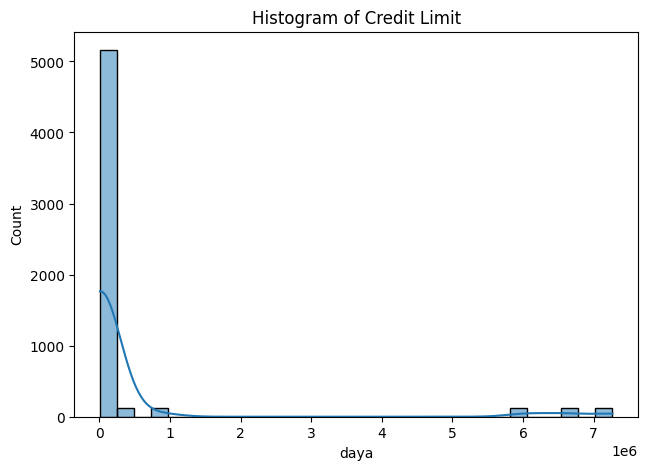

In [27]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(data['daya'], kde = True, bins = 30)
plt.title('Histogram of Credit Limit')

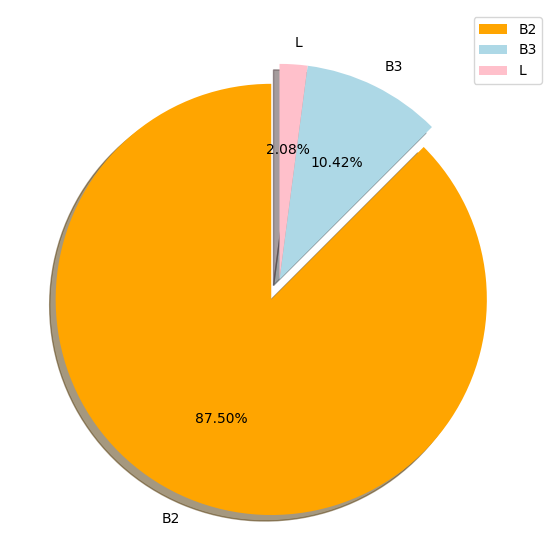

In [28]:
labels = ['B2','B3','L']
size = df['tarif'].value_counts()
colors = ['orange', 'lightblue', 'pink']
explode = [0.1, 0, 0,]

fig, axes = plt.subplots(figsize=(8, 7))
plt.pie(size, colors = colors, explode = explode,
        labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('', fontsize = 20)
plt.legend()
plt.show()

In [29]:
data['IndexMonth'] = data['BLTH'].dt.strftime('%m')


In [30]:
data['IndexYear'] = data['BLTH'].dt.strftime('%y')

<Axes: xlabel='tarif'>

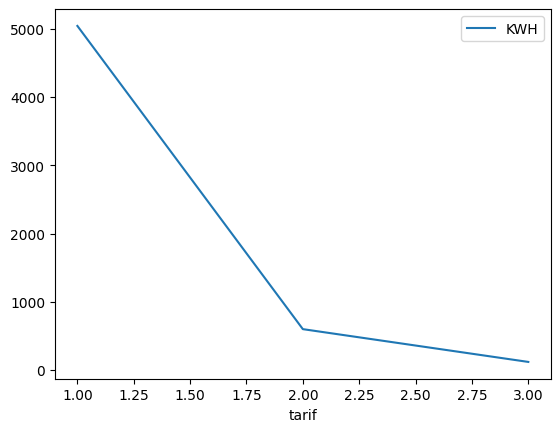

In [31]:
sortingbymonth = (data.groupby('tarif')[['KWH']].count()).sort_index()
sortingbymonth.plot(legend=True)

<Axes: xlabel='IndexMonth'>

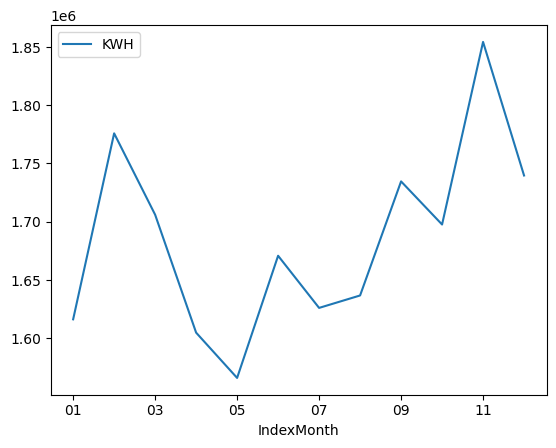

In [32]:
sortingbymonth = (data.groupby('IndexMonth')[['KWH']].sum()).sort_index()
sortingbymonth.plot(legend=True)

<Axes: xlabel='IndexYear'>

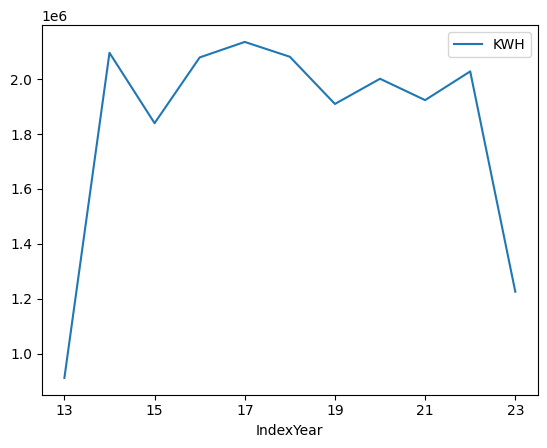

In [33]:
sortingbymonth = (data.groupby('IndexYear')[['KWH']].sum()).sort_index()
sortingbymonth.plot(legend=True)

Text(0.5, 1.0, 'Penggunaan KWH per Bulan')

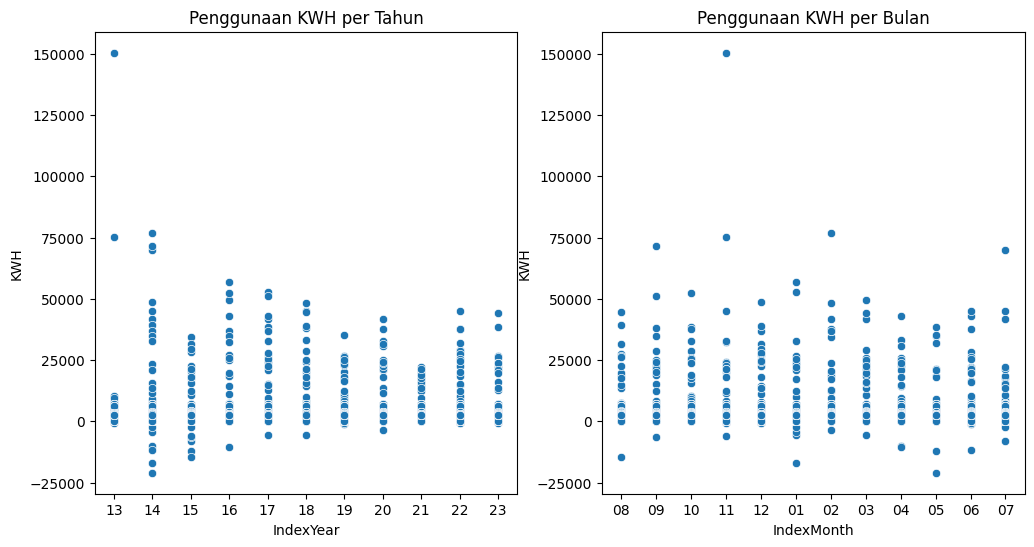

In [34]:
plt.figure(figsize=(12, 6))  

# Scatterplot 1
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x="IndexYear", y="KWH")
plt.title('Penggunaan KWH per Tahun')

# Scatterplot 2
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x="IndexMonth", y="KWH")
plt.title('Penggunaan KWH per Bulan')

# # Scatterplot 3
# plt.subplot(1, 3, 3)
# sns.scatterplot(data=df, x="CREDIT_LIMIT", y="PURCHASES_FREQUENCY")
# plt.title('CREDIT_LIMIT vs PURCHASES_FREQUENCY')

# # Adjust layout
# plt.tight_layout()

# # Show the plots
# plt.show()

Text(0.5, 1.0, 'Penggunaan tarif per Bulan')

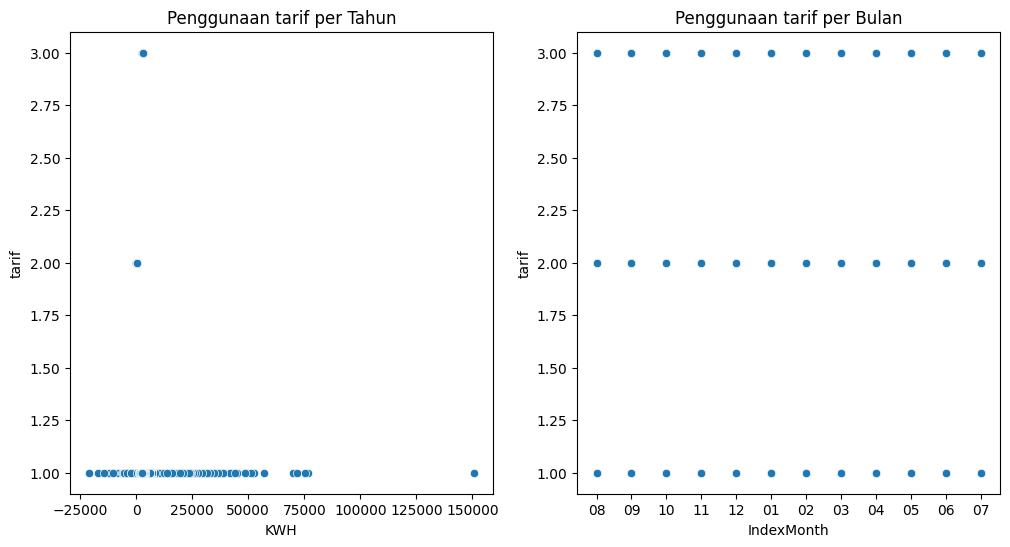

In [35]:
plt.figure(figsize=(12, 6))  

# Scatterplot 1
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x="KWH", y="tarif")
plt.title('Penggunaan tarif per Tahun')

# Scatterplot 2
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x="IndexMonth", y="tarif")
plt.title('Penggunaan tarif per Bulan')

# # Scatterplot 3
# plt.subplot(1, 3, 3)
# sns.scatterplot(data=df, x="CREDIT_LIMIT", y="PURCHASES_FREQUENCY")
# plt.title('CREDIT_LIMIT vs PURCHASES_FREQUENCY')

# # Adjust layout
# plt.tight_layout()

# # Show the plots
# plt.show()

<Axes: xlabel='KWH'>

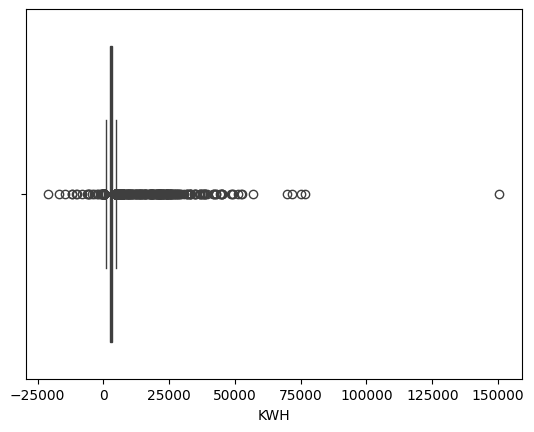

In [36]:
sns.boxplot(x=data['KWH'])

<Axes: xlabel='KWH'>

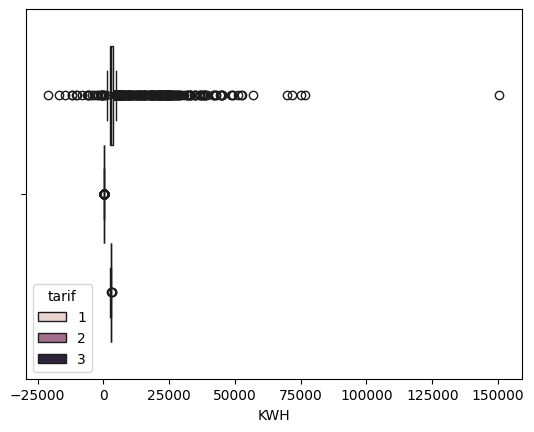

In [37]:
sns.boxplot(x=data['KWH'], hue=data['tarif'])

In [38]:
q1 = data['KWH'].quantile(0.25)
q3 = data['KWH'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

# filter data outlier
outlier = data['KWH'][(data['KWH']<low_bound) | (data['KWH']>up_bound)]

# filter data non-outlier
no_outlier = data['KWH'][(data['KWH']>=low_bound) & (data['KWH']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(data["KWH"]):.2f}%%')

Upper Boundary: 4897.70
Lower Boundary: 756.58
Percentage of outliers: 21.88%%


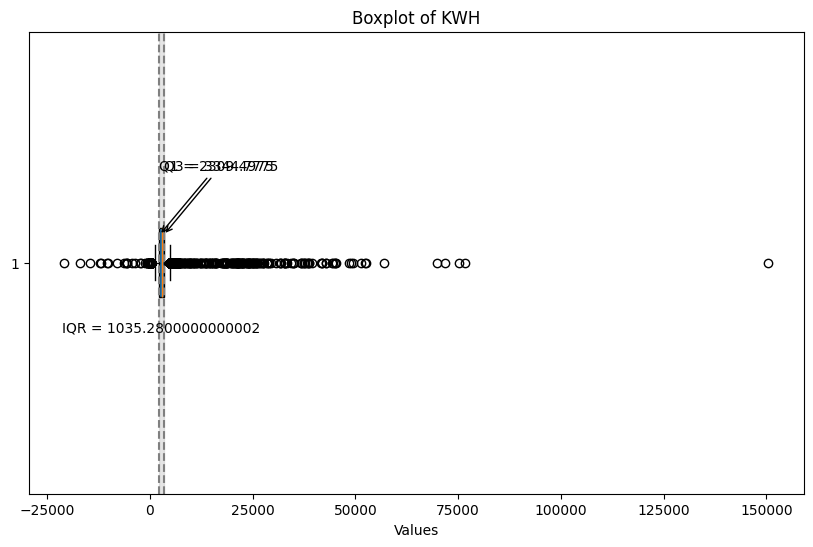

In [39]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['KWH'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of KWH')

plt.show()

In [40]:
print("mean: ", data['KWH'].mean())
print("median: ", data['KWH'].median())
print("modus: ", data['KWH'].mode()[0])

mean:  3511.9891796875
median:  2913.535
modus:  283.0


In [41]:
std2 = data['KWH'].std()
print('Standard Deviation :',std2)

Standard Deviation : 5069.335806093627


# Feature Engineer


In [42]:
pd.set_option('display.max_colwidth', None)

cat_cols = (data.select_dtypes(include=['int64', 'float64']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, data[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,KWH,5382
1,tarif,3
2,daya,10
3,city_id,34
4,fkm,4
5,latitude,48
6,longitude,48
7,province_id,11
8,uiw,11
9,ulp,35


In [43]:
pd.set_option('display.max_colwidth', None)

cat_cols = (data.select_dtypes(include=['object']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, data[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,customer_id,48
1,address,48
2,city_name,34
3,fare_type,3
4,gardu_id,48
5,meter_description,1
6,name,42
7,payment_type,1
8,pemda_id,29
9,province_name,11


In [44]:
data = data.drop(columns=['BLTH','has_invoice','amr_online','registered_to_infoblast','direct_measure','fare_type','customer_id','address','city_name','gardu_id','name','pemda_id'
                                   ,'province_name','uiw_name','ulp_name','up3','site_id','IndexMonth','IndexYear'])

## Split Target

In [45]:
#Splitting between 'X' and 'y'

X = data.drop(['tarif'], axis = 1)
y = data['tarif']
X

,KWH,daya,city_id,fkm,latitude,longitude,meter_description,payment_type,province_id,uiw,ulp,company_id,latest_status_id,meter_type_id,frt,pemakaian_kwh.1
0,3795.00,10600.0,1106,1,5.581664,95.347843,Meter AMR,POSTPAID,11,11,11115,telkomsel,HIDUP,A,1,3455.0
1,3664.00,10600.0,1106,1,5.581664,95.347843,Meter AMR,POSTPAID,11,11,11115,telkomsel,HIDUP,A,1,3455.0
2,4305.00,10600.0,1106,1,5.581664,95.347843,Meter AMR,POSTPAID,11,11,11115,telkomsel,HIDUP,A,1,3455.0
3,3755.72,10600.0,1106,1,5.581664,95.347843,Meter AMR,POSTPAID,11,11,11115,telkomsel,HIDUP,A,1,3455.0
4,3452.89,10600.0,1106,1,5.581664,95.347843,Meter AMR,POSTPAID,11,11,11115,telkomsel,HIDUP,A,1,3455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,2697.86,10600.0,3673,1,-6.130831,106.225094,Meter AMR,POSTPAID,36,56,56140,telkomsel,SELESAI,A,1,2839.0
5756,2702.84,10600.0,3673,1,-6.130831,106.225094,Meter AMR,POSTPAID,36,56,56140,telkomsel,SELESAI,A,1,2839.0
5757,2719.31,10600.0,3673,1,-6.130831,106.225094,Meter AMR,POSTPAID,36,56,56140,telkomsel,SELESAI,A,1,2839.0
5758,2768.72,10600.0,3673,1,-6.130831,106.225094,Meter AMR,POSTPAID,36,56,56140,telkomsel,SELESAI,A,1,2839.0


In [46]:
#Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40, stratify=y)
print('x Train Size: ', X_train.shape)
print('x Test Size: ', X_test.shape)
print('y Train Size: ', y_train.shape)
print('y Test Size: ', y_test.shape)

x Train Size:  (4608, 16)
x Test Size:  (1152, 16)
y Train Size:  (4608,)
y Test Size:  (1152,)


In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4608 entries, 5678 to 3305
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KWH                4608 non-null   float64
 1   daya               4608 non-null   float64
 2   city_id            4608 non-null   int64  
 3   fkm                4608 non-null   int64  
 4   latitude           4608 non-null   float64
 5   longitude          4608 non-null   float64
 6   meter_description  4608 non-null   object 
 7   payment_type       4608 non-null   object 
 8   province_id        4608 non-null   int64  
 9   uiw                4608 non-null   int64  
 10  ulp                4608 non-null   int64  
 11  company_id         4608 non-null   object 
 12  latest_status_id   4608 non-null   object 
 13  meter_type_id      4608 non-null   object 
 14  frt                4608 non-null   int64  
 15  pemakaian_kwh.1    4608 non-null   float64
dtypes: float64(5), int64(6), o

## Handling Outlier

In [48]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Get numeric columns excluding 'object' dtype
num_cols = (X_train.select_dtypes(exclude='object').columns)

# Filter out columns with 'Period' dtype
num_cols = [col for col in num_cols if not pd.api.types.is_period_dtype(data[col])]

listItem = []

for col in num_cols:
    listItem.append([col, X_train[col].skew()])

result_df = pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data=listItem)

# Print or use the resulting DataFrame
result_df

C:\Users\Mardhya\AppData\Local\Temp\ipykernel_17352\2749434313.py:9: FutureWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  num_cols = [col for col in num_cols if not pd.api.types.is_period_dtype(data[col])]


,nama kolom,nilai skewness
0,KWH,6.272021
1,daya,3.665222
2,city_id,1.043988
3,fkm,3.625713
4,latitude,6.567363
5,longitude,6.567363
6,province_id,1.056956
7,uiw,-0.746434
8,ulp,-0.740832
9,frt,0.000000


In [49]:
# First, capping the normal distribution

winsoriser_age = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=1,
                            variables=['fkm'],
                            missing_values='ignore')

X_train_capped = winsoriser_age.fit_transform(X_train)
X_test_capped = winsoriser_age.transform(X_test)

In [50]:
winsoriser2 = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1,
                            variables=['KWH','daya','city_id','latitude','longitude'
                                       ,'province_id','uiw','ulp','pemakaian_kwh.1'],
                            missing_values='ignore')

X_train_capped = winsoriser2.fit_transform(X_train)
X_test_capped = winsoriser2.transform(X_test)

In [51]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

KWH - Before Capping


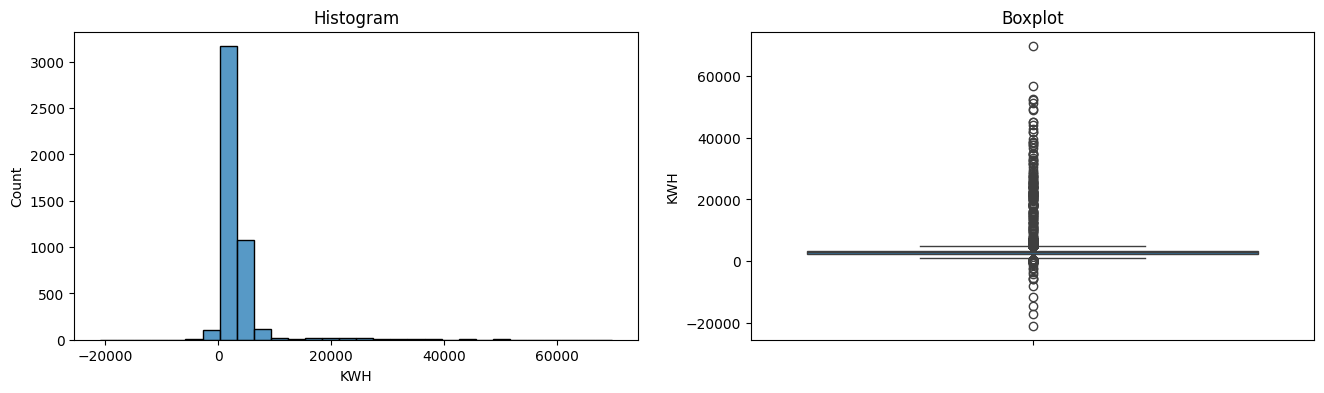


KWH - After Capping


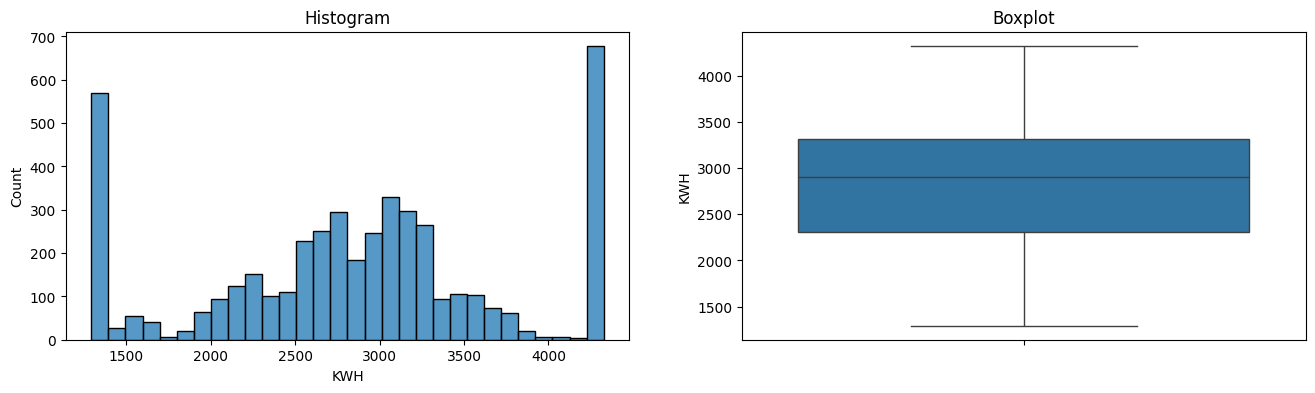

daya - Before Capping


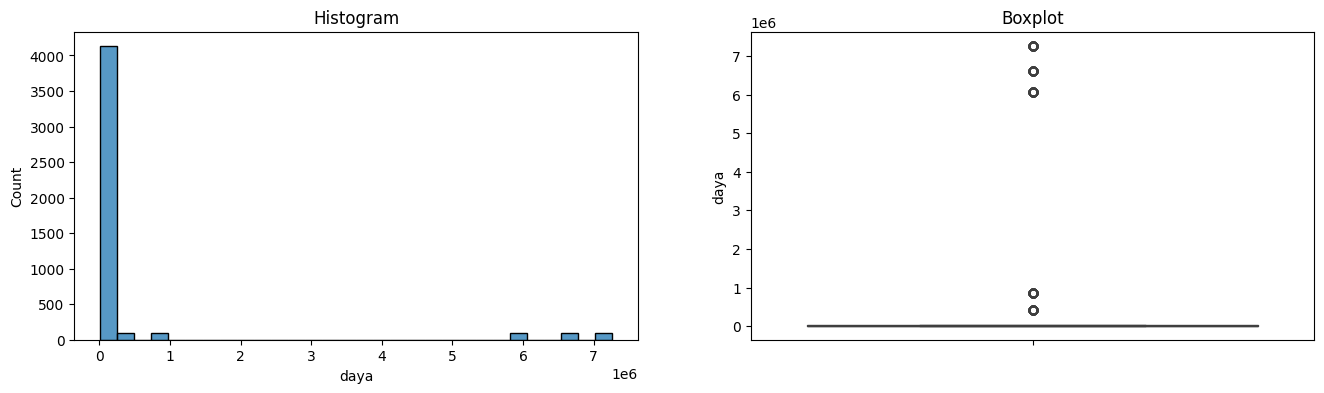


daya - After Capping


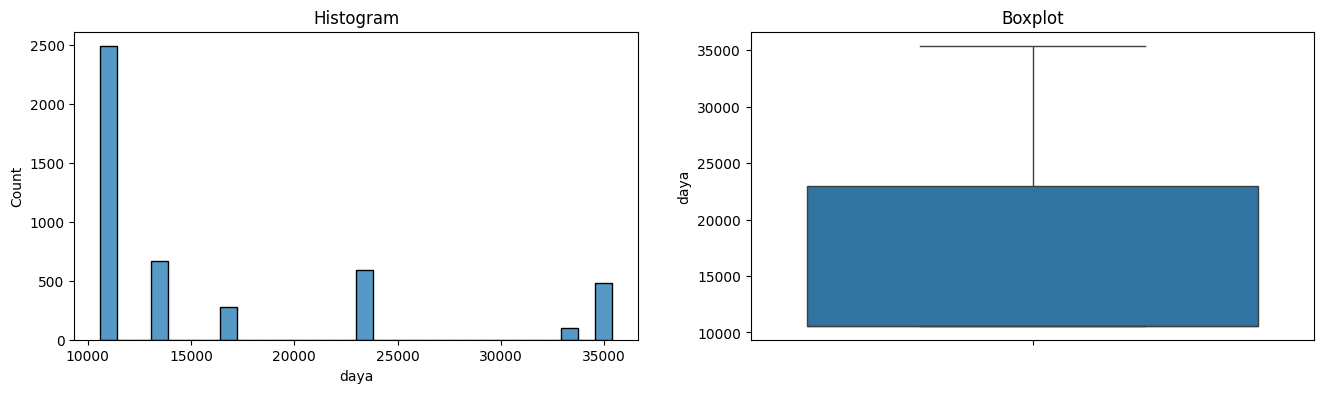

city_id - Before Capping


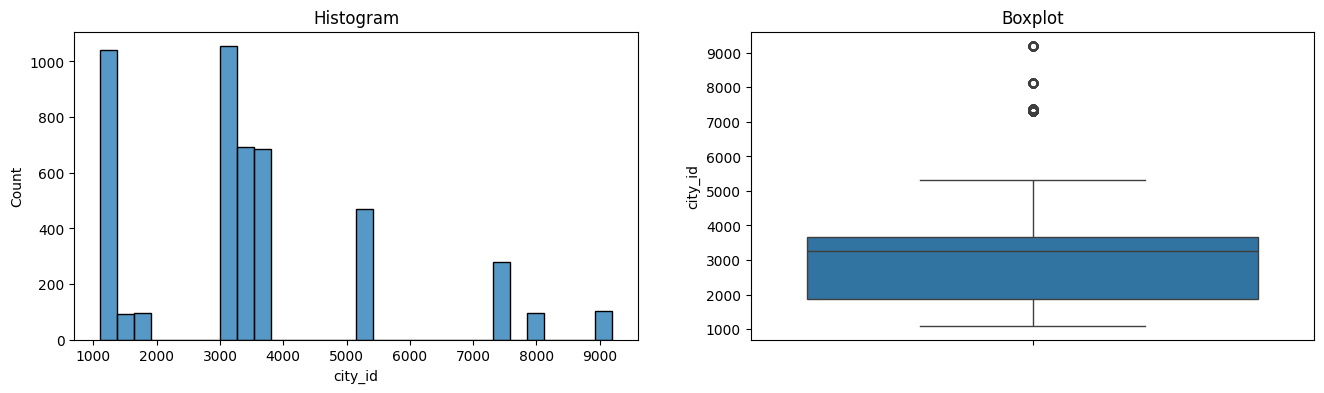


city_id - After Capping


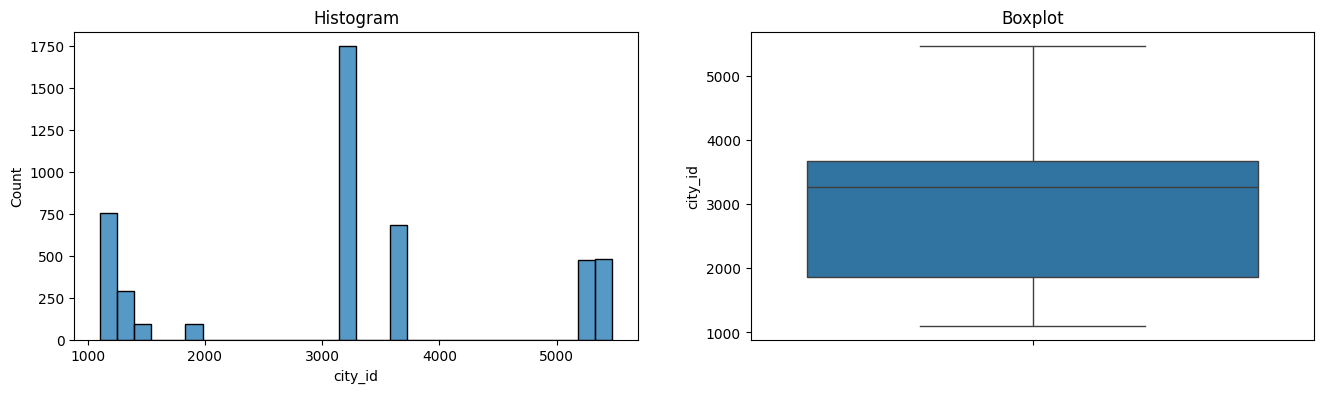

fkm - Before Capping


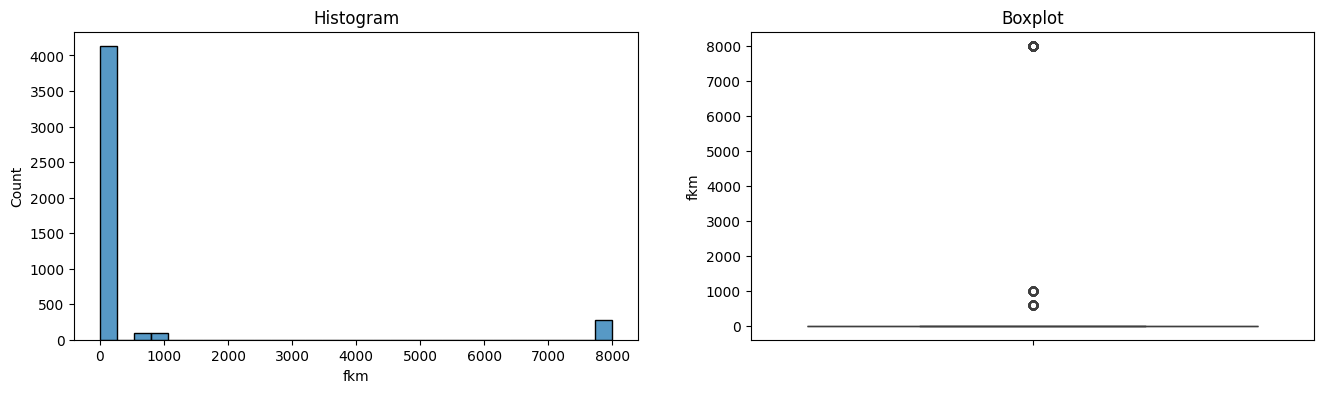


fkm - After Capping


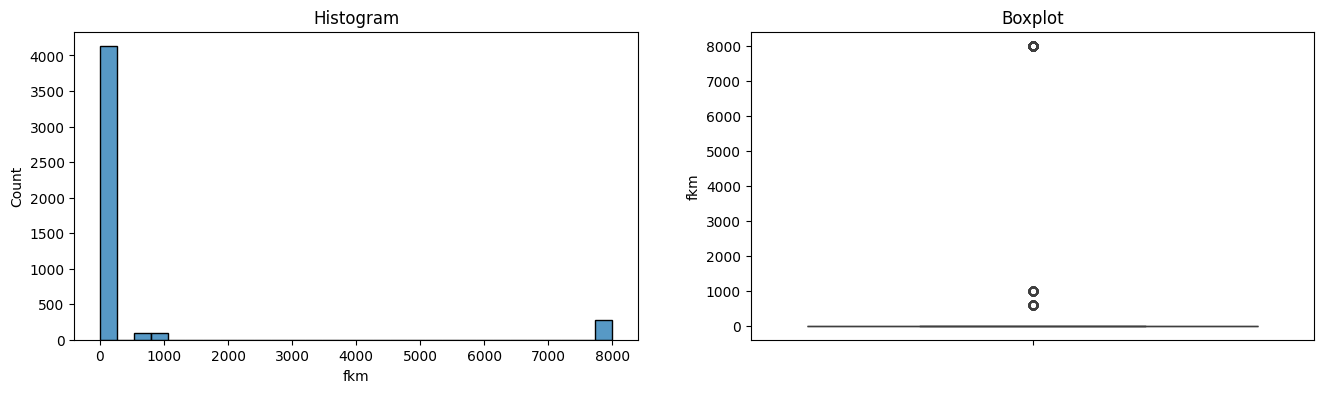

latitude - Before Capping


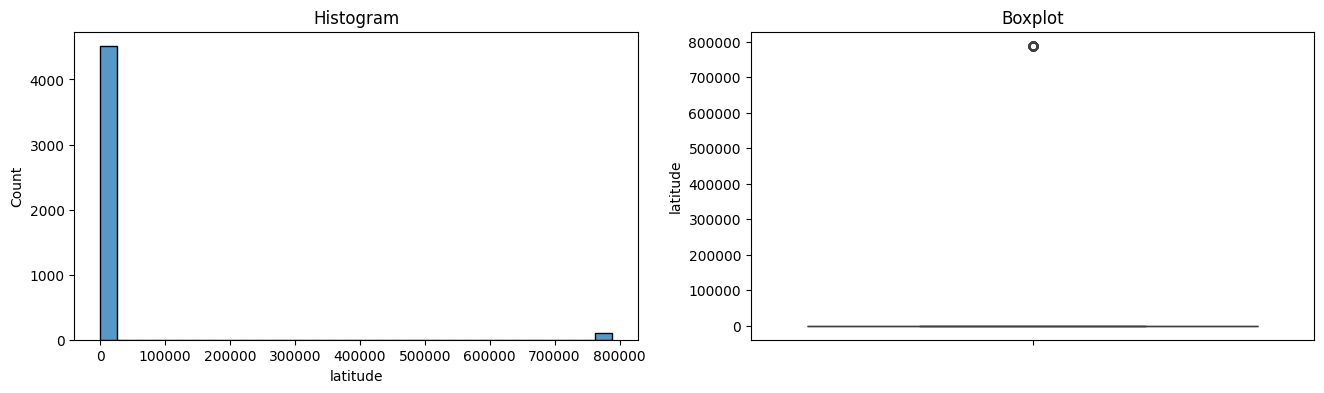


latitude - After Capping


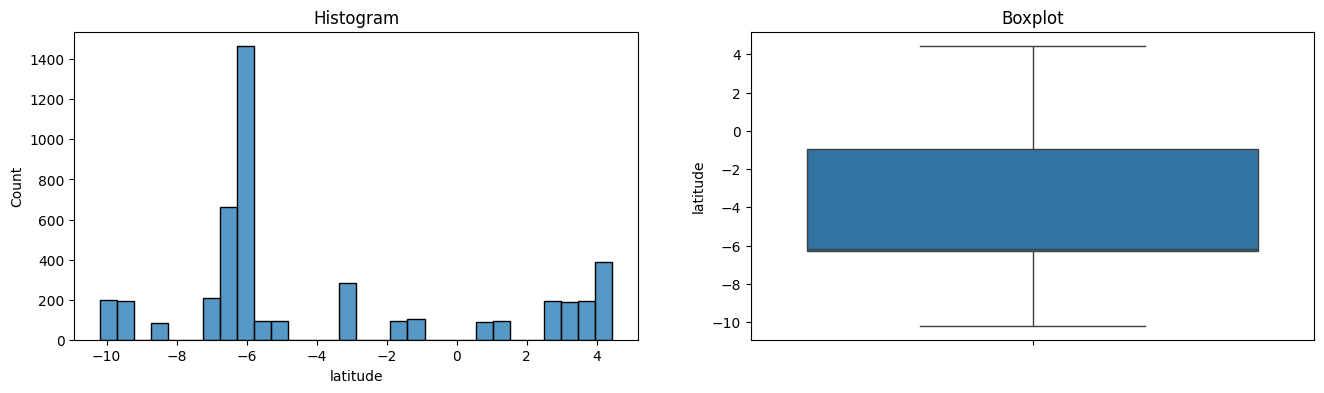

longitude - Before Capping


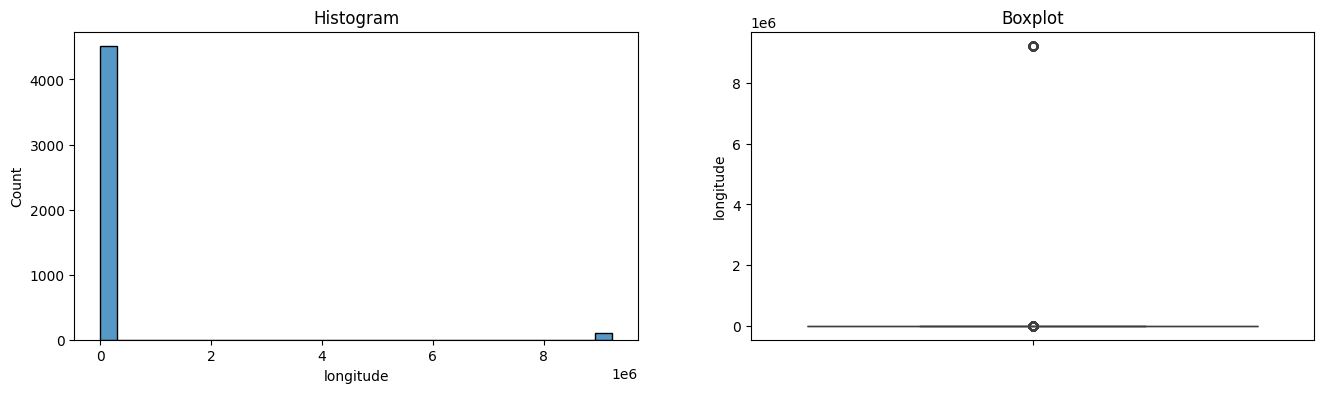


longitude - After Capping


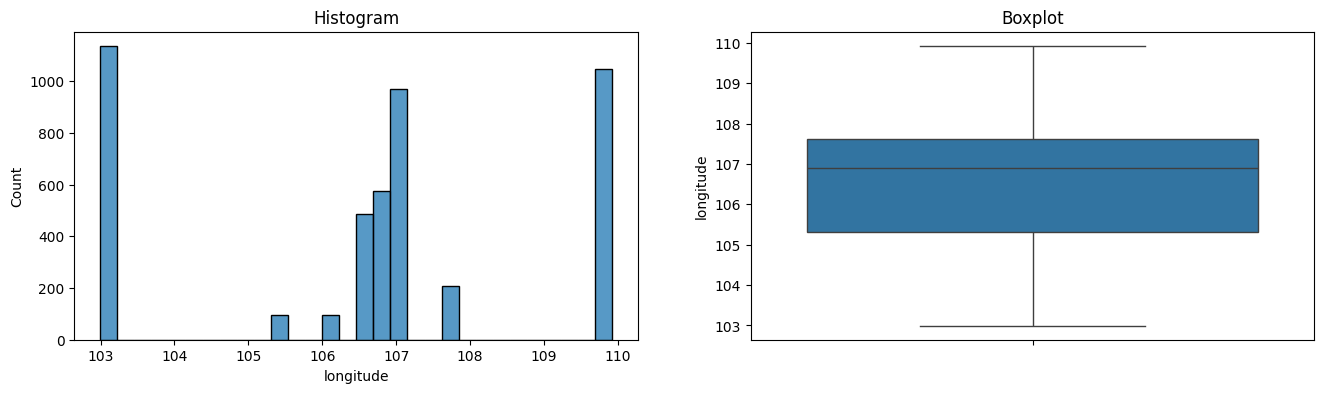

province_id - Before Capping


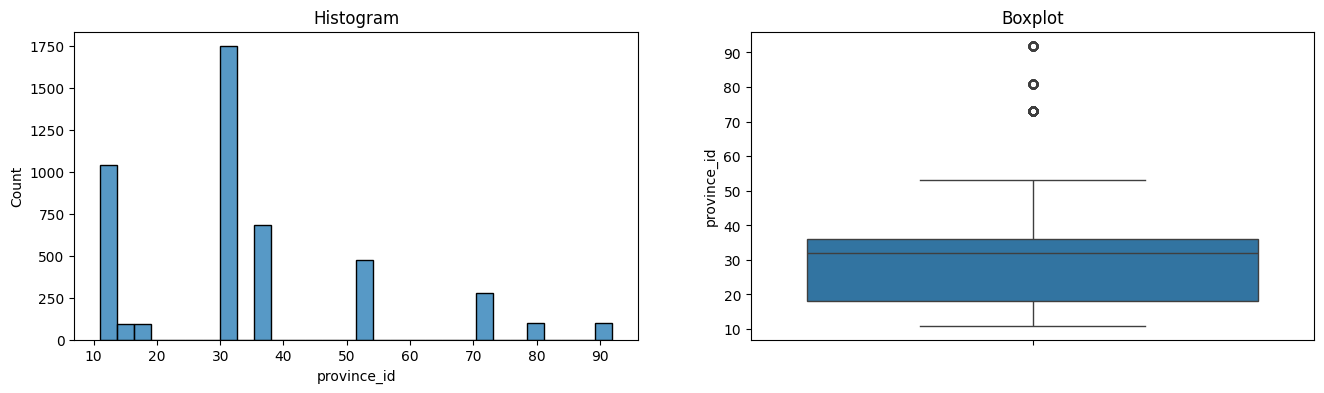


province_id - After Capping


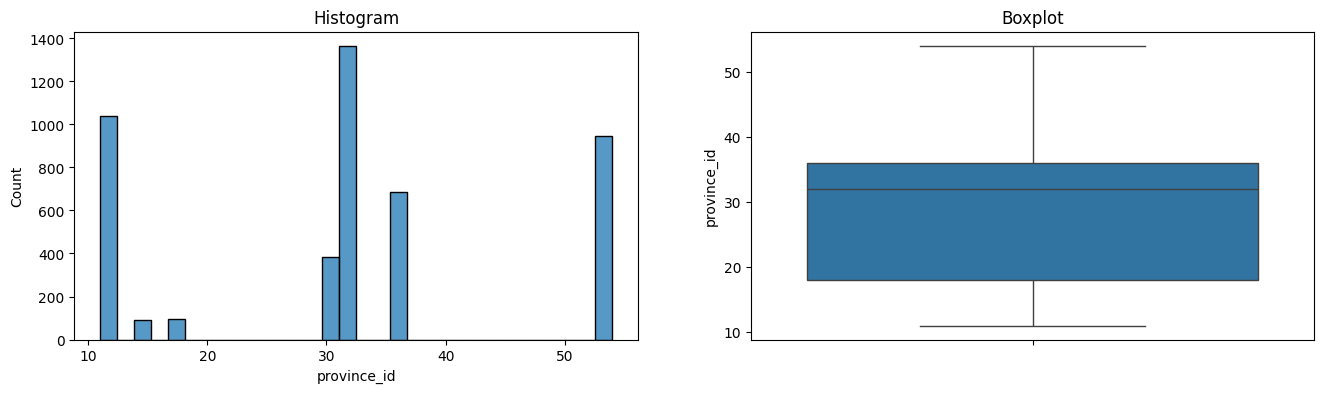

uiw - Before Capping


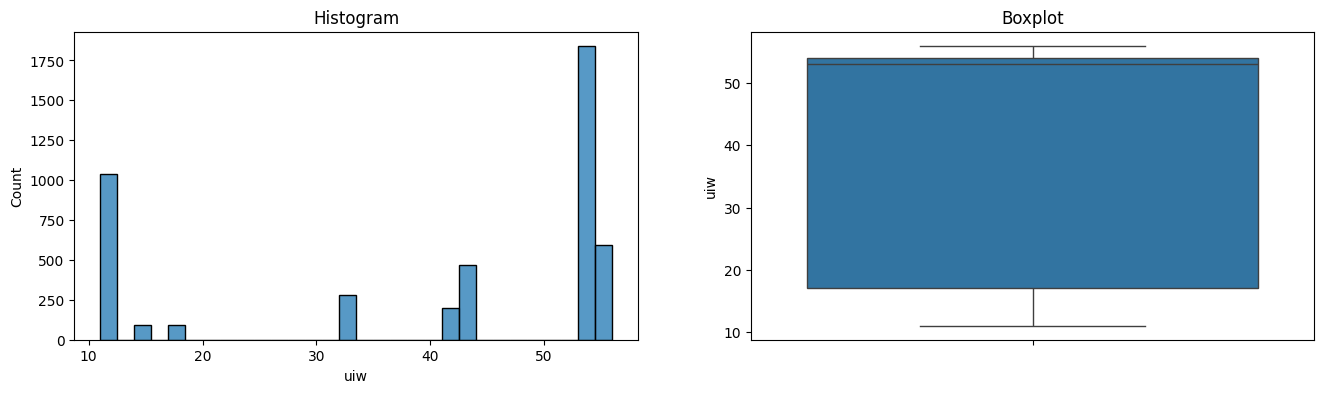


uiw - After Capping


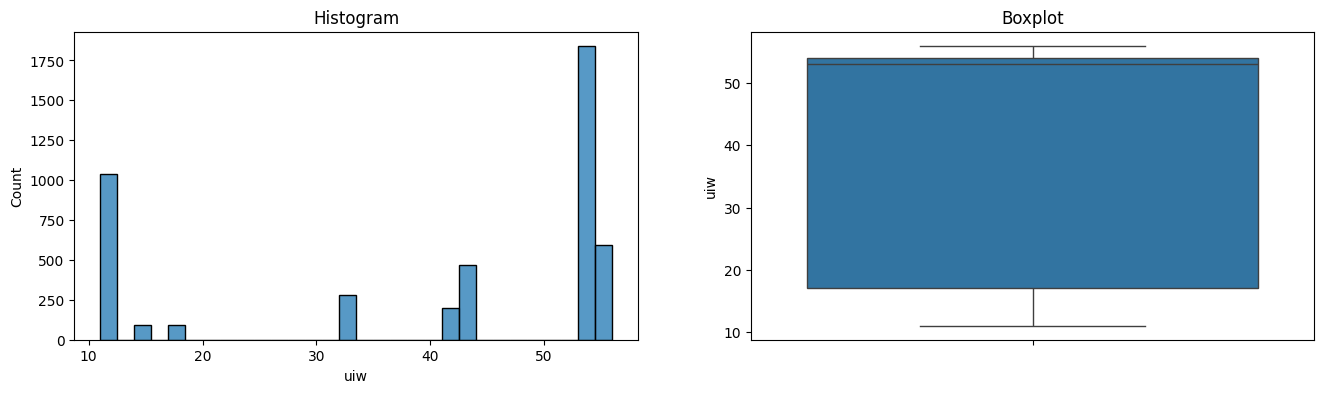

ulp - Before Capping


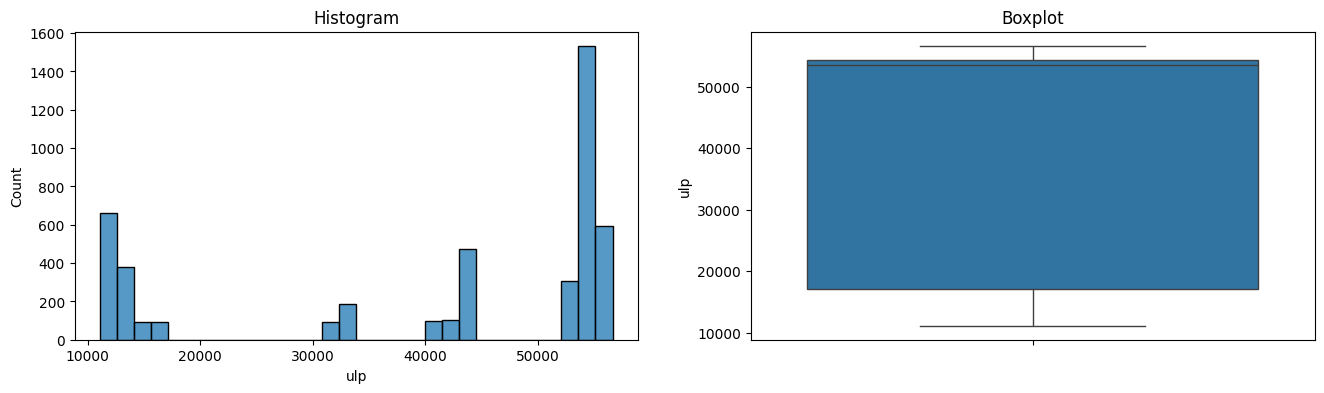


ulp - After Capping


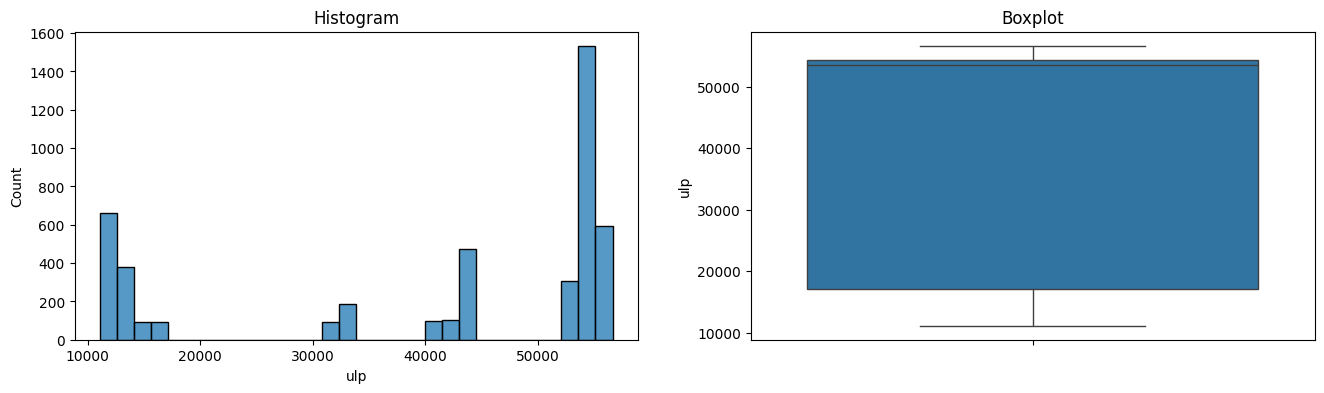

frt - Before Capping


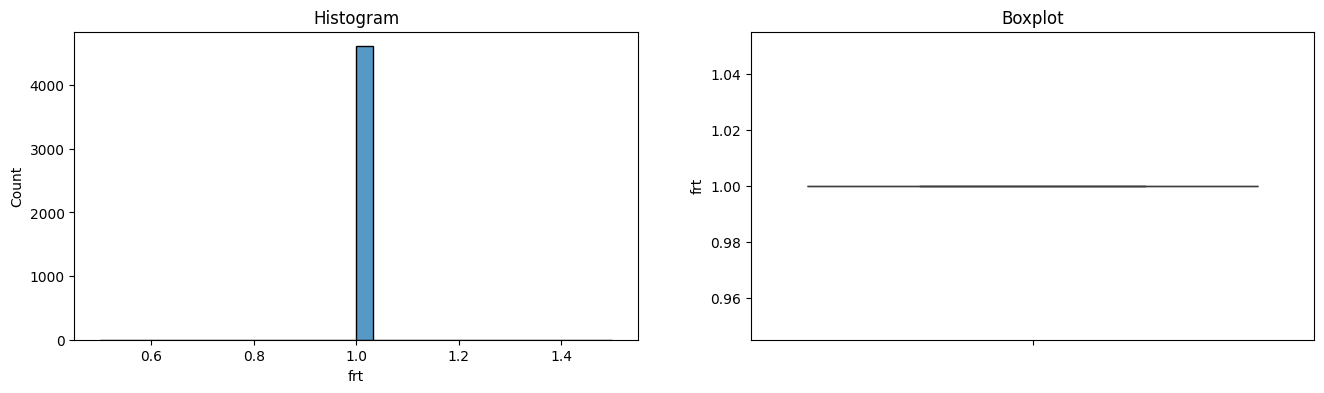


frt - After Capping


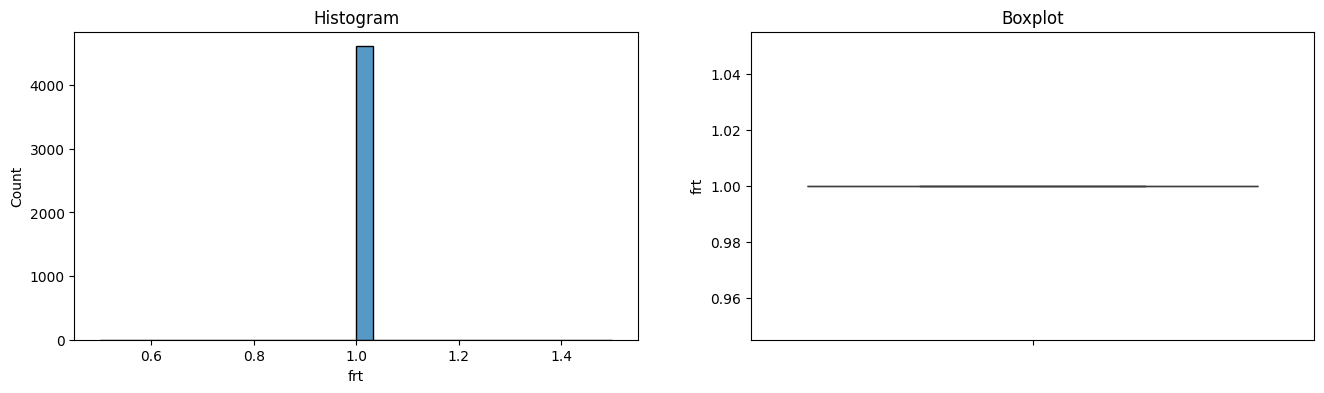

pemakaian_kwh.1 - Before Capping


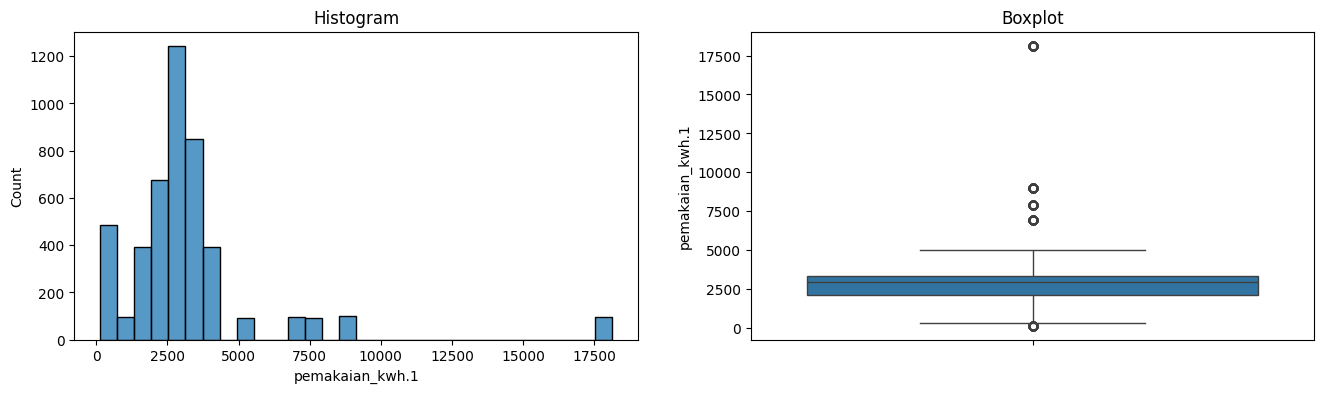


pemakaian_kwh.1 - After Capping


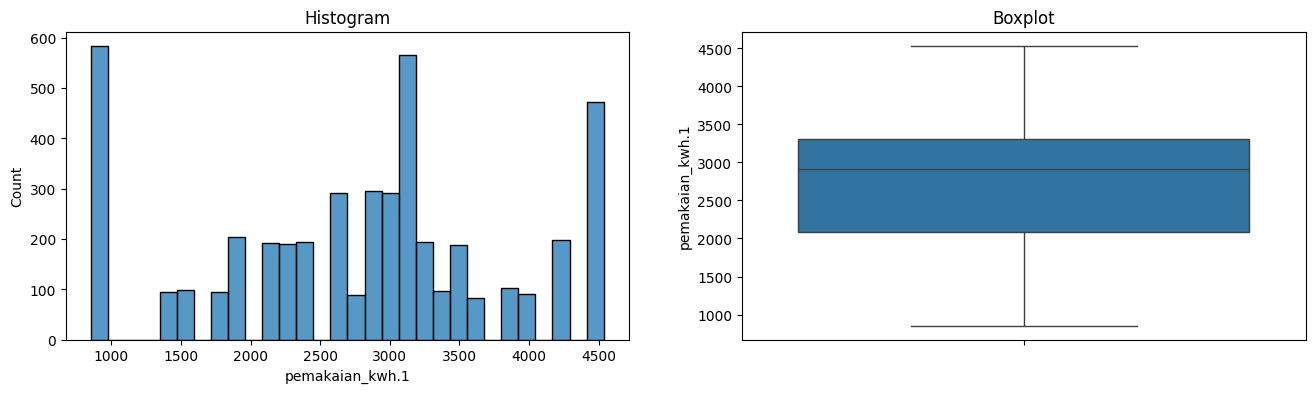

In [52]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

<Axes: xlabel='KWH'>

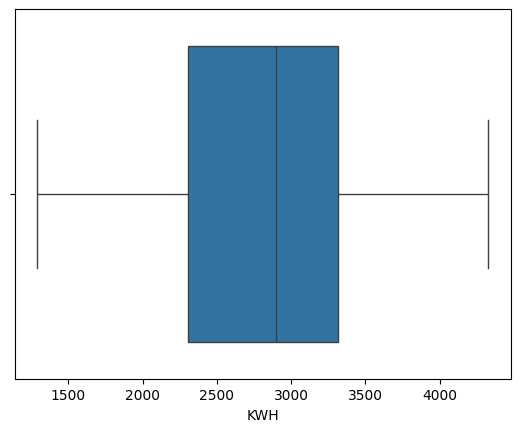

In [53]:
sns.boxplot(x=X_train_capped['KWH'])

<Axes: xlabel='KWH'>

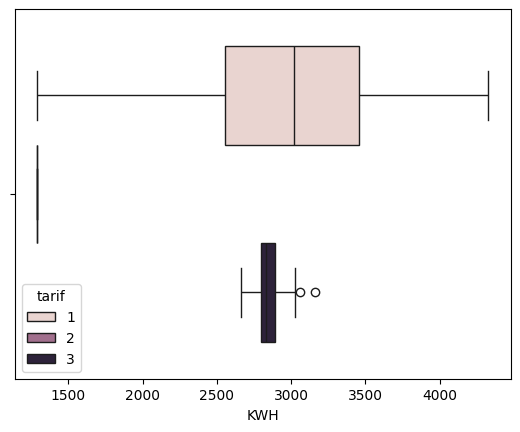

In [54]:
sns.boxplot(x=X_train_capped['KWH'], hue=data['tarif'])

In [55]:
q1 = X_train_capped['KWH'].quantile(0.25)
q3 = X_train_capped['KWH'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

# filter X_train_capped outlier
outlier = X_train_capped['KWH'][(X_train_capped['KWH']<low_bound) | (X_train_capped['KWH']>up_bound)]

# filter X_train_capped non-outlier
no_outlier = X_train_capped['KWH'][(X_train_capped['KWH']>=low_bound) & (X_train_capped['KWH']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(X_train_capped["KWH"]):.2f}%%')

Upper Boundary: 4833.76
Lower Boundary: 785.89
Percentage of outliers: 0.00%%


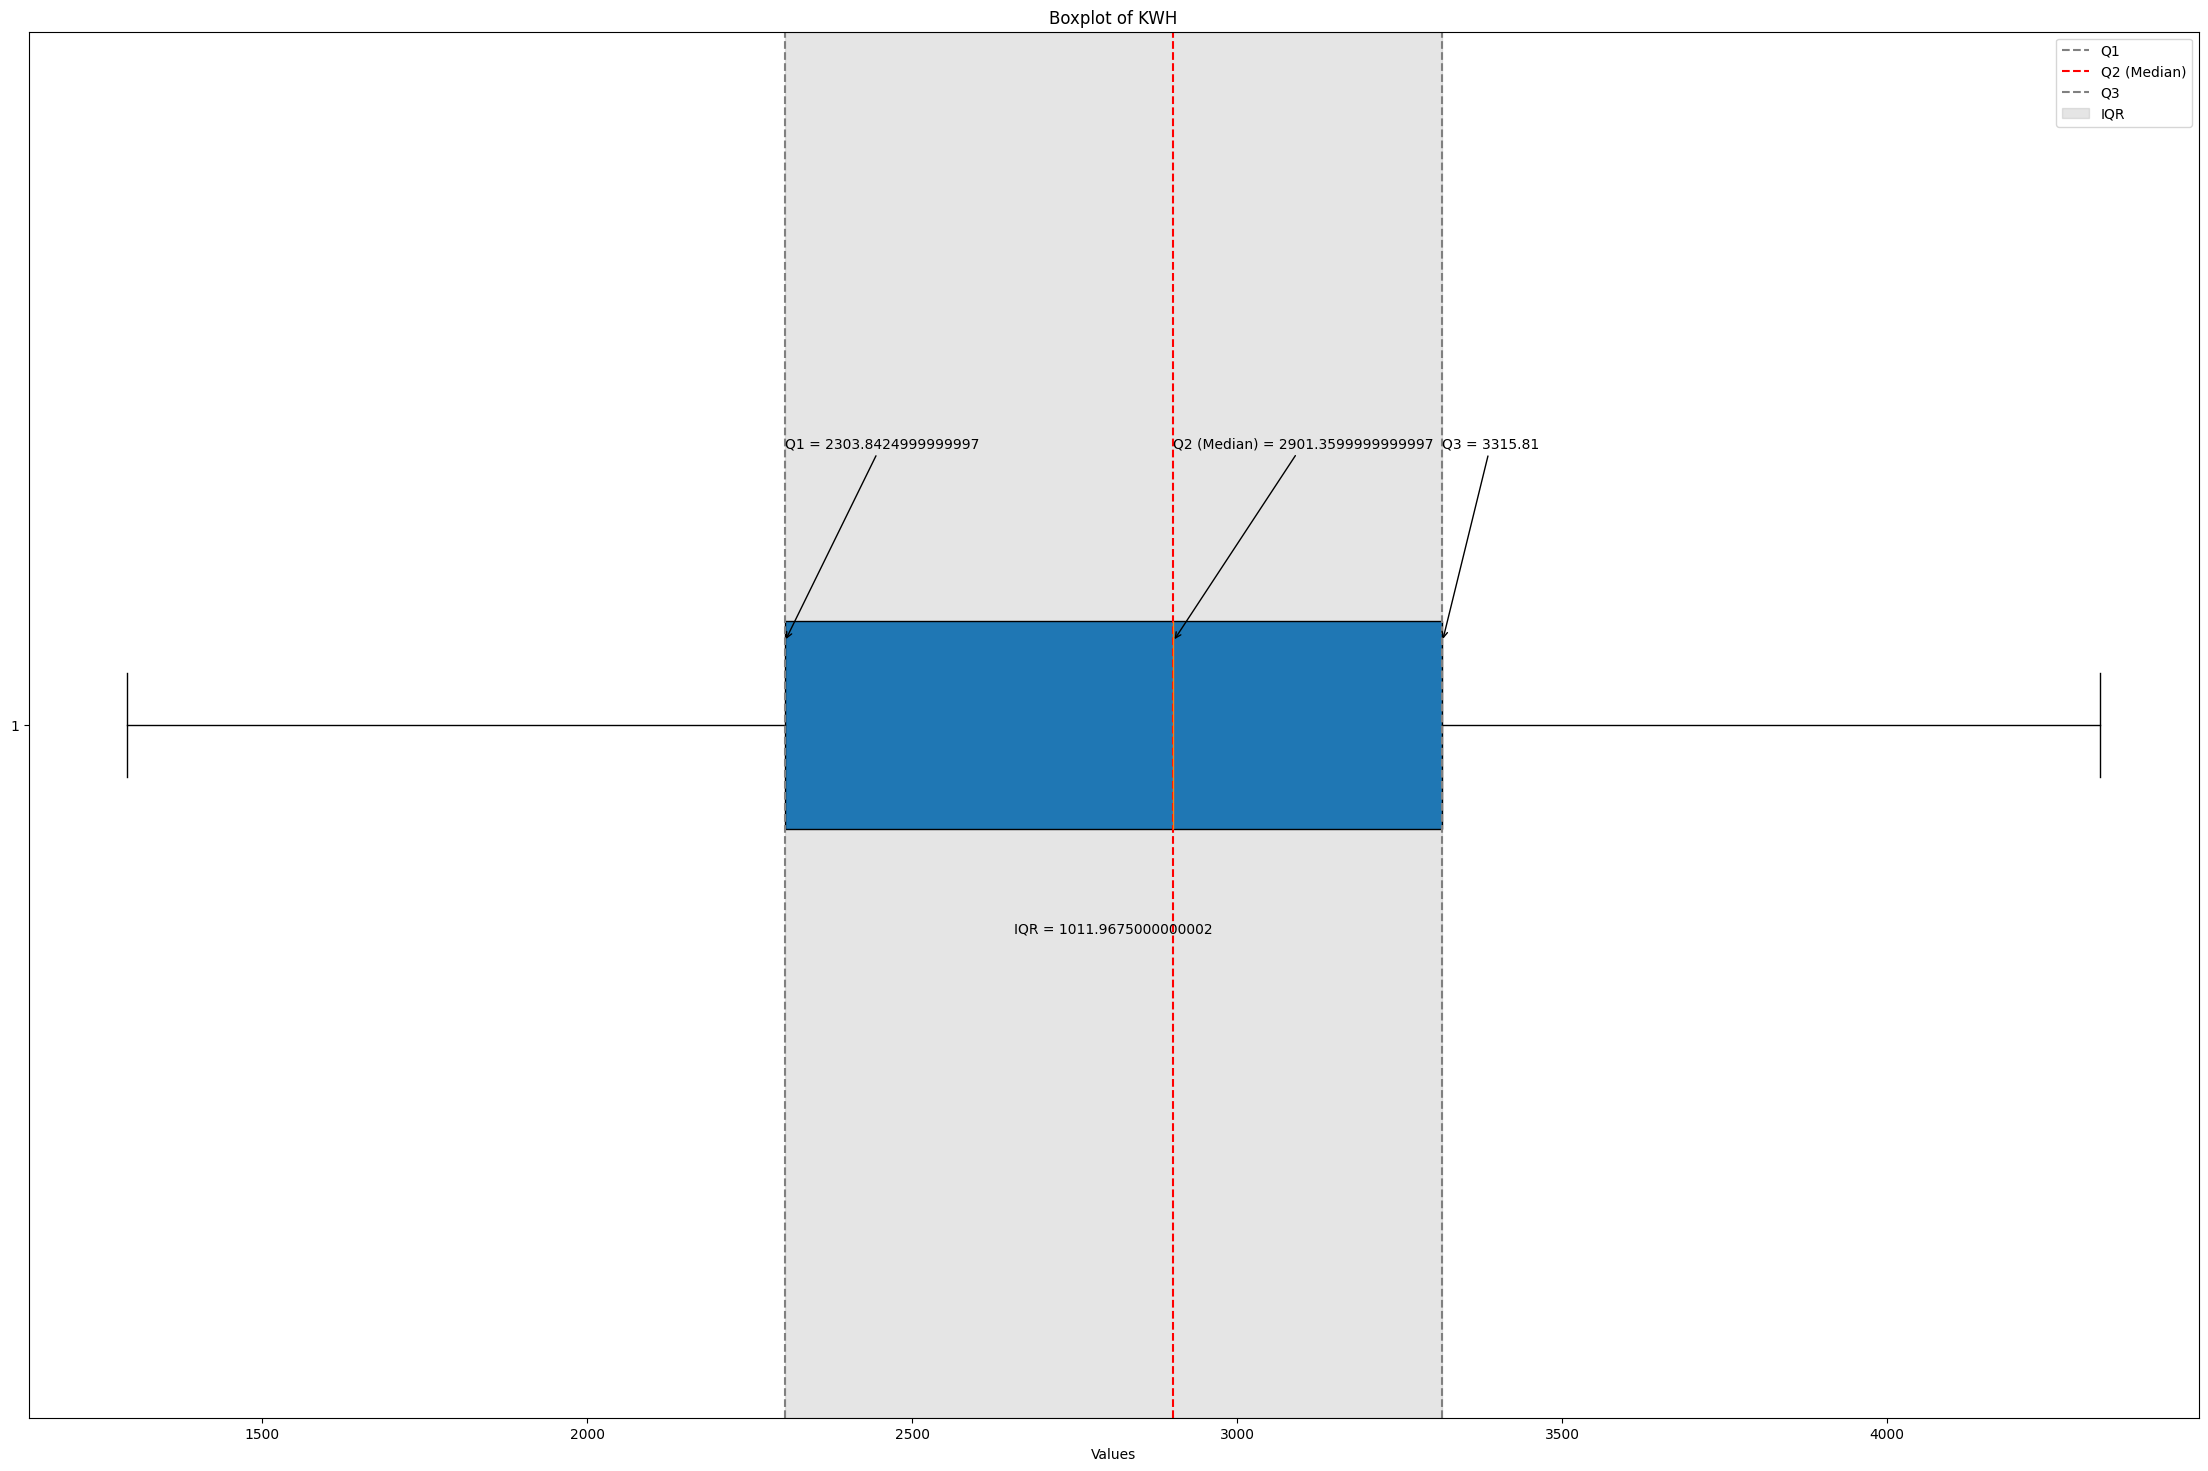

In [56]:
import matplotlib.pyplot as plt

# Assuming you have already calculated q1, q3, and iqr

# Calculate Q2 (median)
q2 = X_train_capped['KWH'].median()

plt.figure(figsize=(28, 18))
plt.boxplot(X_train_capped['KWH'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1 + q3) / 2, 0.85), ha='center')
plt.annotate(f'Q2 (Median) = {q2}', xy=(q2, 1.06), xytext=(q2, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q2, linestyle='--', color='red', label='Q2 (Median)')  # Adjust the color as needed
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of KWH')
plt.legend()

plt.show()


## Split Between Num Columns and Cat Columns


In [57]:
#get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['KWH', 'daya', 'city_id', 'fkm', 'latitude', 'longitude', 'province_id', 'uiw', 'ulp', 'frt', 'pemakaian_kwh.1']
Categorical Columns:  ['meter_description', 'payment_type', 'company_id', 'latest_status_id', 'meter_type_id']


In [58]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,KWH,daya,city_id,fkm,latitude,longitude,province_id,uiw,ulp,frt,pemakaian_kwh.1
5678,2728.62,10600.0,3673,1,-6.130831,106.225094,36,56,56140,1,2839.0
3856,4954.80,16500.0,3201,1,-6.553734,106.846803,32,53,53861,1,2431.0
1,3664.00,10600.0,1106,1,5.581664,95.347843,11,11,11115,1,3455.0
470,3098.52,13200.0,1271,1,3.610020,98.693640,12,12,12801,1,2870.0
2112,3081.62,10600.0,9202,1,-0.927680,134.037050,92,42,42410,1,3050.0
...,...,...,...,...,...,...,...,...,...,...,...
4601,2313.41,10600.0,3275,1,-6.218880,106.959160,32,54,54420,1,2087.0
2384,3205.20,10600.0,5303,1,-9.514127,124.509697,53,43,43150,1,3153.0
5497,280.95,7265000.0,3174,8000,-6.304857,106.845991,31,54,54740,1,281.0
3314,2579.49,23000.0,3275,1,-6.240901,106.999077,32,53,53711,1,8990.0


In [59]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,nama kolom,hasil
0,KWH,ada korelasi
1,daya,ada korelasi
2,city_id,ada korelasi
3,fkm,ada korelasi
4,latitude,ada korelasi
5,longitude,ada korelasi
6,province_id,ada korelasi
7,uiw,ada korelasi
8,ulp,ada korelasi
9,frt,ga ada korelasi


In [60]:
X_train.drop(['frt'], axis=1, inplace=True)

# Model

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [62]:
transformer = ColumnTransformer([
('scaler', StandardScaler(), selector(dtype_exclude='object')),
('encoding', OneHotEncoder(), selector(dtype_include='object'))
])

# pipe_if = Pipeline([
#     ('transformer', transformer),
#     ('model', IsolationForest(n_estimators=100,
#                             contamination='auto'))
# ])

# pipe_lof = Pipeline([
#     ('transformer', transformer),
#     ('model', LocalOutlierFactor(n_neighbors=20, contamination=0.1, metric='euclidean'))
# ])

# pipe_ocsvm = Pipeline([
#     ('transformer', transformer),
#     ('model', OneClassSVM(nu=0.05))
# ])

In [63]:
X_scaled = transformer.fit_transform(X_train_capped)

## Base Model Evaluation

### Isolation Forest

In [64]:
# Get the anomalies with Isolation Forest
from sklearn.ensemble import IsolationForest

# Initiate isolation forest
isolation = IsolationForest(n_estimators=100,
                            contamination='auto')

# Fit and predict
isolation.fit(X_scaled)
outliers_predicted1 = isolation.predict(X_scaled)

# Address outliers in a new column
X_train_capped['IF'] = outliers_predicted1
X_train_capped

,KWH,daya,city_id,fkm,latitude,longitude,meter_description,payment_type,province_id,uiw,ulp,company_id,latest_status_id,meter_type_id,frt,pemakaian_kwh.1,IF
5678,2728.6200,10600.0,3673,1,-6.130831,106.225094,Meter AMR,POSTPAID,36,56,56140,telkomsel,SELESAI,A,1,2839.0,1
3856,4327.7775,16500.0,3201,1,-6.553734,106.846803,Meter AMR,POSTPAID,32,53,53861,telkomsel,RENCANA,A,1,2431.0,-1
1,3664.0000,10600.0,1106,1,4.449497,102.992915,Meter AMR,POSTPAID,11,11,11115,telkomsel,HIDUP,A,1,3455.0,-1
470,3098.5200,13200.0,1271,1,3.610020,102.992915,Meter AMR,POSTPAID,12,12,12801,telkomsel,SELESAI,A,1,2870.0,-1
2112,3081.6200,10600.0,5475,1,-0.927680,109.926170,Meter AMR,POSTPAID,54,42,42410,telkomsel,SELESAI,A,1,3050.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4601,2313.4100,10600.0,3275,1,-6.218880,106.959160,Meter AMR,POSTPAID,32,54,54420,telkomsel,HIDUP,A,1,2087.0,1
2384,3205.2000,10600.0,5303,1,-9.514127,109.926170,Meter AMR,POSTPAID,53,43,43150,telkomsel,SELESAI,A,1,3153.0,1
5497,1291.8750,35400.0,3174,8000,-6.304857,106.845991,Meter AMR,POSTPAID,31,54,54740,telkomsel,NYALA,A,1,855.0,-1
3314,2579.4900,23000.0,3275,1,-6.240901,106.999077,Meter AMR,POSTPAID,32,53,53711,telkomsel,SELESAI,A,1,4536.0,1


In [65]:
# Inisialisasi model Isolation Forest
isolation_forest_model = IsolationForest(contamination=0.1, random_state=42)

# Latih model pada data latih
isolation_forest_model.fit(X_scaled)

# Hitung skor anomali pada data latih
anomaly_scores = isolation_forest_model.decision_function(X_scaled)

# Konversi skor menjadi nilai positif
anomaly_scores = -anomaly_scores

# Print skor anomali untuk beberapa contoh data
print("Anomaly Scores:")
print(anomaly_scores[:10])

Anomaly Scores:
[-0.07724069 -0.07600584 -0.01702697 -0.0673474  -0.05904457 -0.04949349
 -0.07048074 -0.14616625  0.02860701 -0.13024812]


In [66]:
# pipe_if.fit(X_train)
# outliers_predicted_if = pipe_if.predict(X_train)
# X_train['IF'] = outliers_predicted_if
# X_train

### Local Outlier Factor

In [67]:
# Get the anomalies with Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1, metric='euclidean')
outliers_predicted2 = lof.fit_predict(X_scaled)
X_train_capped['LOF'] = outliers_predicted2
X_train_capped

,KWH,daya,city_id,fkm,latitude,longitude,meter_description,payment_type,province_id,uiw,ulp,company_id,latest_status_id,meter_type_id,frt,pemakaian_kwh.1,IF,LOF
5678,2728.6200,10600.0,3673,1,-6.130831,106.225094,Meter AMR,POSTPAID,36,56,56140,telkomsel,SELESAI,A,1,2839.0,1,1
3856,4327.7775,16500.0,3201,1,-6.553734,106.846803,Meter AMR,POSTPAID,32,53,53861,telkomsel,RENCANA,A,1,2431.0,-1,1
1,3664.0000,10600.0,1106,1,4.449497,102.992915,Meter AMR,POSTPAID,11,11,11115,telkomsel,HIDUP,A,1,3455.0,-1,1
470,3098.5200,13200.0,1271,1,3.610020,102.992915,Meter AMR,POSTPAID,12,12,12801,telkomsel,SELESAI,A,1,2870.0,-1,1
2112,3081.6200,10600.0,5475,1,-0.927680,109.926170,Meter AMR,POSTPAID,54,42,42410,telkomsel,SELESAI,A,1,3050.0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4601,2313.4100,10600.0,3275,1,-6.218880,106.959160,Meter AMR,POSTPAID,32,54,54420,telkomsel,HIDUP,A,1,2087.0,1,1
2384,3205.2000,10600.0,5303,1,-9.514127,109.926170,Meter AMR,POSTPAID,53,43,43150,telkomsel,SELESAI,A,1,3153.0,1,1
5497,1291.8750,35400.0,3174,8000,-6.304857,106.845991,Meter AMR,POSTPAID,31,54,54740,telkomsel,NYALA,A,1,855.0,-1,1
3314,2579.4900,23000.0,3275,1,-6.240901,106.999077,Meter AMR,POSTPAID,32,53,53711,telkomsel,SELESAI,A,1,4536.0,1,1


## 1650

In [68]:
# pipe_lof.fit(X_train)
# outliers_predicted_lof = pipe_lof.fit_predict(X_train)
# X_train['LOF'] = outliers_predicted_lof
# X_train

### One-class SVM

In [69]:
# Get the anomalies with Local Outlier Factor
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(nu=0.05)
outliers_predicted3 = ocsvm.fit_predict(X_scaled)
X_train_capped['OCSVM'] = outliers_predicted3
X_train_capped

,KWH,daya,city_id,fkm,latitude,longitude,meter_description,payment_type,province_id,uiw,ulp,company_id,latest_status_id,meter_type_id,frt,pemakaian_kwh.1,IF,LOF,OCSVM
5678,2728.6200,10600.0,3673,1,-6.130831,106.225094,Meter AMR,POSTPAID,36,56,56140,telkomsel,SELESAI,A,1,2839.0,1,1,1
3856,4327.7775,16500.0,3201,1,-6.553734,106.846803,Meter AMR,POSTPAID,32,53,53861,telkomsel,RENCANA,A,1,2431.0,-1,1,1
1,3664.0000,10600.0,1106,1,4.449497,102.992915,Meter AMR,POSTPAID,11,11,11115,telkomsel,HIDUP,A,1,3455.0,-1,1,1
470,3098.5200,13200.0,1271,1,3.610020,102.992915,Meter AMR,POSTPAID,12,12,12801,telkomsel,SELESAI,A,1,2870.0,-1,1,1
2112,3081.6200,10600.0,5475,1,-0.927680,109.926170,Meter AMR,POSTPAID,54,42,42410,telkomsel,SELESAI,A,1,3050.0,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4601,2313.4100,10600.0,3275,1,-6.218880,106.959160,Meter AMR,POSTPAID,32,54,54420,telkomsel,HIDUP,A,1,2087.0,1,1,1
2384,3205.2000,10600.0,5303,1,-9.514127,109.926170,Meter AMR,POSTPAID,53,43,43150,telkomsel,SELESAI,A,1,3153.0,1,1,1
5497,1291.8750,35400.0,3174,8000,-6.304857,106.845991,Meter AMR,POSTPAID,31,54,54740,telkomsel,NYALA,A,1,855.0,-1,1,-1
3314,2579.4900,23000.0,3275,1,-6.240901,106.999077,Meter AMR,POSTPAID,32,53,53711,telkomsel,SELESAI,A,1,4536.0,1,1,1


In [70]:
# pipe_ocsvm.fit(X_train)
# outliers_predicted_ocsvm = pipe_ocsvm.predict(X_train)
# X_train['OCSVM'] = outliers_predicted_ocsvm
# X_train

**Output of IF, IOF, OCSVM :**

1 as inlier

-1 as outlier.

In [71]:
pca_2d = PCA(n_components=2)
X_scaled_pca_2d = pca_2d.fit_transform(X_scaled)

Text(0.5, 0, '1st Component')

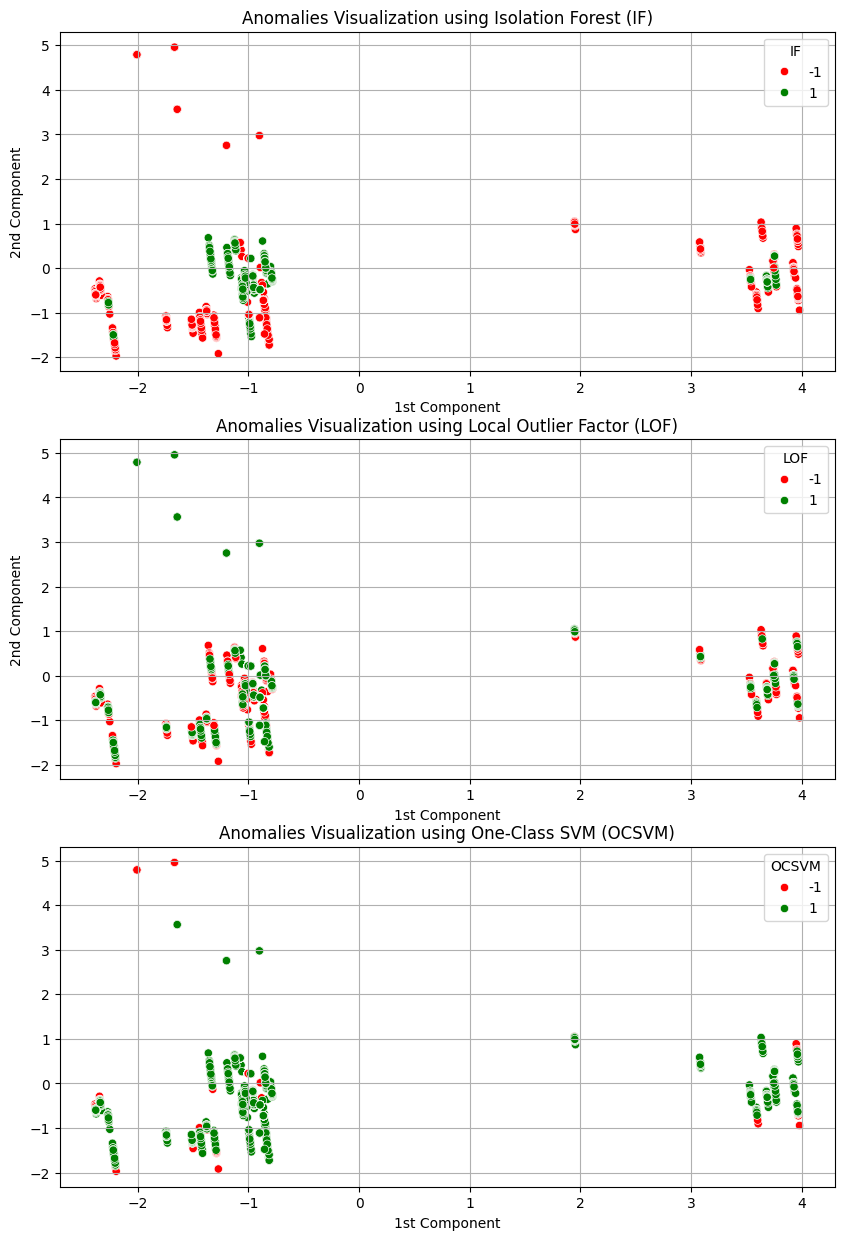

In [72]:
# Plot the Cumulative of Explained Variance Ratio
plt.figure(figsize=(10, 15))  # Adjust the figure size as needed

# Isolation Forest (IF) Visualization
plt.subplot(3, 1, 1)
plt.grid()
sns.scatterplot(x=X_scaled_pca_2d[:, 0], y=X_scaled_pca_2d[:, 1], hue=X_train_capped['IF'], palette=['red', 'green'])
plt.title('Anomalies Visualization using Isolation Forest (IF)')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')

# Local Outlier Factor (LOF) Visualization
plt.subplot(3, 1, 2)
plt.grid()
sns.scatterplot(x=X_scaled_pca_2d[:, 0], y=X_scaled_pca_2d[:, 1], hue=X_train_capped['LOF'], palette=['red', 'green'])
plt.title('Anomalies Visualization using Local Outlier Factor (LOF)')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')

# One-Class SVM (OCSVM) Visualization
plt.subplot(3, 1, 3)
plt.grid()
sns.scatterplot(x=X_scaled_pca_2d[:, 0], y=X_scaled_pca_2d[:, 1], hue=X_train_capped['OCSVM'], palette=['red', 'green'])
plt.title('Anomalies Visualization using One-Class SVM (OCSVM)')
plt.xlabel('1st Component')


In [73]:
from sklearn.metrics import classification_report

print("Isolation Forest Classification Report:")
print(classification_report(y_train, outliers_predicted1))

print("Local Outlier Factor Classification Report:")
print(classification_report(y_train, -1 * outliers_predicted2))  # Convert LOF scores to match the labels


Isolation Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.45      0.62      4032
           2       0.00      0.00      0.00       480
           3       0.00      0.00      0.00        96

    accuracy                           0.39      4608
   macro avg       0.25      0.11      0.15      4608
weighted avg       0.88      0.39      0.54      4608

Local Outlier Factor Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       0.97      0.11      0.20      4032
           2       0.00      0.00      0.00       480
           3       0.00      0.00      0.00        96

    accuracy                           0.10      4608
   macro avg       0.24      0.03      0.05      4608
weighted avg       0.85      0.10      0.17      4608



C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print("One-Class SVM Classification Report:")
print(classification_report(y_train, -1 * outliers_predicted3))  # Convert OCSVM scores to match the labels

One-Class SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       0.52      0.05      0.09      4032
           2       0.00      0.00      0.00       480
           3       0.00      0.00      0.00        96

    accuracy                           0.04      4608
   macro avg       0.13      0.01      0.02      4608
weighted avg       0.46      0.04      0.08      4608



C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
#Menghitung standar deviasi
std_dev = X_train_capped['KWH'].std()

# Menentukan jumlah standar deviasi untuk batas atas dan batas bawah (misalnya, 2 standar deviasi)
num_std_dev = 2

# Menghitung batas atas
upper_limit = X_train_capped['KWH'].mean() + (num_std_dev * std_dev)

# Menghitung batas bawah
lower_limit = X_train_capped['KWH'].mean() - (num_std_dev * std_dev)

# Menampilkan hasil
print(f'\nStandar Deviasi: {std_dev}')
print(f'Batas Atas: {upper_limit}')
print(f'Batas Bawah: {lower_limit}')


Standar Deviasi: 902.355277819119
Batas Atas: 4662.9234104559455
Batas Bawah: 1053.50229917947


In [75]:
import joblib

# Assuming 'X_test_new' is your new data for inference

# Train the Isolation Forest model
isolation = IsolationForest(n_estimators=100, contamination='auto')
isolation.fit(X_scaled)

# Save the model to a file
joblib.dump(isolation, 'isolation_forest_model.joblib')

# Load the model for inference
loaded_model = joblib.load('isolation_forest_model.joblib')

# Transform the new data
X_test_new_scaled = transformer.transform(X_test_new)

# Make predictions on the new data
outliers_predicted_new = loaded_model.predict(X_test_new_scaled)

# Display or use the predictions
print("Predictions on New Data:")
print(outliers_predicted_new)

NameError: name 'X_test_new' is not defined